# Visualisation using Blender

This notebook uses Blender and blender_notebook ([install instructions here](https://github.com/cheng-chi/blender_notebook)). Once you have it setup you should be able to see ```blender``` as a possible kernel.

You also need to have installed the swc extension for Blender:
https://github.com/MartinPyka/SWC2Blender

Installation instructions from that page:
_Simple copy the io_mesh_swc folder into your addon folder and activate the addon within Blender. Then you can import swc-files via File - Import - SWC Import_

Please note that the current version (checked 2021-03-15) has a bug displaying incorrect radius. Snudda has a local copy of the code here where the bug is fixed that you can copy to your Blender addon folder:
```Snudda/snudda/plotting/Blender/io_mesh_swc```


This example assumes that you have run ```simple_network_creation.ipynb``` to generate a network.

If ```neuron_id``` is not specified, the entire network will be generated.

In [ ]:
import os
from snudda.plotting.Blender.visualisation.visualise_network import VisualiseNetwork

network_path = os.path.join("networks","simple_example")
blender_output_image = os.path.join(network_path, "neuron-rendering.png")

vn = VisualiseNetwork(network_path=network_path, blender_output_image=blender_output_image)
vn.visualise(neuron_id=[0,7])

### If Blender crashed due to library version mismatch error

If your Blender crashed with the error below in the log files:

```
Warning! ***HDF5 library version mismatched error***
The HDF5 header files used to compile this application do not match
the version used by the HDF5 library to which this application is linked.
Data corruption or segmentation faults may occur if the application continues.
This can happen when an application was compiled by one version of HDF5 but
linked with a different version of static or shared HDF5 library.
You should recompile the application or check your shared library related
settings such as 'LD_LIBRARY_PATH'.
You can, at your own risk, disable this warning by setting the environment
variable 'HDF5_DISABLE_VERSION_CHECK' to a value of '1'.
Setting it to 2 or higher will suppress the warning messages totally.
Headers are 1.12.0, library is 1.10.4
```

### Workaround

You can verify that it was the cause by trying to ```import h5py```. If so you can use ```fake_load.py``` to work around it.

In a python console started in ```Snudda/examples/notebooks``` folder please run:
```
from snudda.utils.fake_load import FakeLoad
fl = FakeLoad("networks/simple_example/network-synapses.hdf5")
fl.export_json("networks/simple_example/network-synapses.json")
```
This will create the file ```networks/simple_example/network-synapses.json```.
After that you can run the below code cell.

In [1]:
import os
from snudda.plotting.Blender.visualisation.visualise_network import VisualiseNetwork

network_path = os.path.join("networks","simple_example")
blender_output_image = os.path.join(network_path, "neuron-rendering.png")

vn = VisualiseNetwork(network_path=network_path, 
                      network_json=os.path.join(network_path, "network-synapses.json"),
                      blender_output_image=blender_output_image)
vn.visualise(neuron_id=[0,7])

/home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor.swc
Adding soma [1.0, 0.0, 0.0, 0.0, 7.47495, -1]
Setting position: [3.52206295 4.6513269  5.12129214]
/home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax.swc
Adding soma [1.0, 0.0, 0.0, 0.0, 6.49, -1]
Setting position: [3.5243717  4.6448322  5.07061057]
Added synapse #1 at [3.5031539432542345, 4.656203570289728, 5.193946572482279]
Added synapse #2 at [3.5301539432542346, 4.554203570289728, 5.244946572482279]
Added synapse #3 at [3.5361539432542344, 4.560203570289727, 5.223946572482279]
nSynapses = 3
Rendering image.


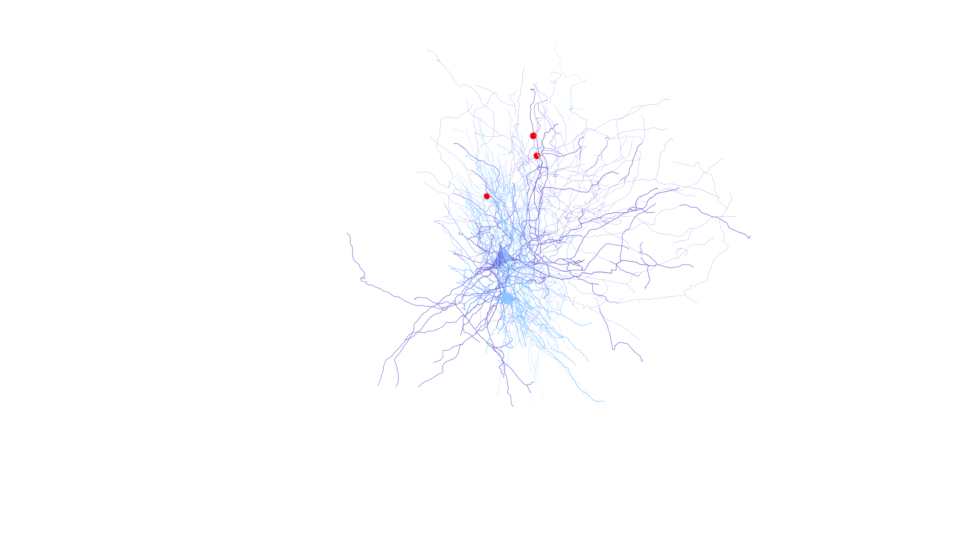

In [2]:
from IPython.display import Image
Image(blender_output_image)

## Rendering the entire network

This is a bit slow...

In [3]:
network_image = os.path.join(network_path, "network-rendering.png")
vn.visualise(blender_output_image=network_image)

Setting position: [3.52206295 4.6513269  5.12129214]
/home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn/str-ispn-e150917_c11_D2-mWT-MSN1-v20190603/WT-MSN1-cor-rep-ax.swc
Adding soma [1.0, 0.0, 0.0, 0.0, 5.61785, -1]
Setting position: [3.52220345 4.61216089 5.05966279]
/home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor.swc
Adding soma [1.0, 0.0, 0.0, 0.0, 6.37456, -1]
Setting position: [3.52247414 4.70315716 5.05053792]
Setting position: [3.52305878 4.70688051 5.01238791]
Setting position: [3.52335257 4.73984633 5.13211806]
Setting position: [3.52336282 4.69666437 5.02874415]
Setting position: [3.52358836 4.60899662 5.13526714]
Setting position: [3.5243717  4.6448322  5.07061057]
Setting position: [3.52569059 4.67570756 5.10324195]
Setting position: [3.5263632  4.64491097 5.10201959]
/home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax.swc
Add

Setting position: [3.62862469 4.72920751 5.1169801 ]
Setting position: [3.62967036 4.6468783  5.09627956]
Setting position: [3.6304667  4.64204438 5.04055172]
Setting position: [3.63286938 4.72621144 5.13398792]
Setting position: [3.63288749 4.71455013 5.07752736]
Setting position: [3.63292887 4.63083381 5.10180761]
Setting position: [3.63316701 4.66259918 5.10772569]
Setting position: [3.63490488 4.67690418 5.04668333]
Setting position: [3.63658806 4.6538767  5.13776017]
Setting position: [3.63714626 4.70659545 5.02508257]
Setting position: [3.63720924 4.69088136 5.13867846]
Setting position: [3.63741627 4.63683643 5.11891345]
Setting position: [3.63879707 4.70222956 5.06450589]
Setting position: [3.63899663 4.68744792 5.05931705]
Setting position: [3.6393378  4.73726333 5.03901343]
Setting position: [3.64031821 4.62343852 5.1272916 ]
Setting position: [3.64109936 4.64504246 5.02170979]
Setting position: [3.6427215  4.66027803 5.0378085 ]
Setting position: [3.64294646 4.63833007 5.054

Added synapse #174 at [3.4491539432542346, 4.662203570289728, 5.064946572482278]
Added synapse #175 at [3.5301539432542346, 4.653203570289728, 5.088946572482279]
Added synapse #176 at [3.5301539432542346, 4.659203570289727, 5.079946572482279]
Added synapse #177 at [3.4761539432542348, 4.599203570289728, 5.028946572482279]
Added synapse #178 at [3.479153943254235, 4.614203570289727, 5.001946572482279]
Added synapse #179 at [3.620153943254235, 4.686203570289727, 5.0679465724822785]
Added synapse #180 at [3.5001539432542343, 4.698203570289728, 5.106946572482279]
Added synapse #181 at [3.5391539432542345, 4.653203570289728, 5.055946572482279]
Added synapse #182 at [3.5421539432542346, 4.566203570289727, 5.109946572482278]
Added synapse #183 at [3.4161539432542347, 4.6682035702897275, 4.992946572482278]
Added synapse #184 at [3.4821539432542346, 4.623203570289728, 4.998946572482279]
Added synapse #185 at [3.4911539432542344, 4.641203570289727, 5.001946572482279]
Added synapse #186 at [3.500

Added synapse #470 at [3.560153943254235, 4.677203570289727, 5.043946572482279]
Added synapse #471 at [3.6111539432542346, 4.731203570289727, 5.094946572482279]
Added synapse #472 at [3.4221539432542345, 4.680203570289728, 4.9509465724822785]
Added synapse #473 at [3.4251539432542346, 4.680203570289728, 4.9509465724822785]
Added synapse #474 at [3.4731539432542347, 4.692203570289728, 4.974946572482279]
Added synapse #475 at [3.5691539432542347, 4.656203570289728, 5.031946572482278]
Added synapse #476 at [3.5571539432542347, 4.722203570289727, 5.016946572482279]
Added synapse #477 at [3.5691539432542347, 4.662203570289728, 5.028946572482279]
Added synapse #478 at [3.6411539432542344, 4.734203570289728, 5.022946572482279]
Added synapse #479 at [3.6741539432542347, 4.7852035702897275, 4.992946572482278]
Added synapse #480 at [3.5301539432542346, 4.7372035702897275, 5.049946572482279]
Added synapse #481 at [3.5721539432542344, 4.812203570289728, 5.034946572482279]
Added synapse #482 at [3.

Added synapse #697 at [3.6051539432542343, 4.701203570289728, 5.103946572482278]
Added synapse #698 at [3.5271539432542345, 4.638203570289727, 5.109946572482278]
Added synapse #699 at [3.5301539432542346, 4.638203570289727, 5.109946572482278]
Added synapse #700 at [3.560153943254235, 4.749203570289727, 5.094946572482279]
Added synapse #701 at [3.6741539432542347, 4.659203570289727, 5.163946572482279]
Added synapse #702 at [3.6741539432542347, 4.728203570289727, 5.169946572482279]
Added synapse #703 at [3.6831539432542346, 4.6682035702897275, 5.109946572482278]
Added synapse #704 at [3.5541539432542346, 4.698203570289728, 5.124946572482279]
Added synapse #705 at [3.6621539432542347, 4.740203570289728, 5.148946572482278]
Added synapse #706 at [3.6711539432542346, 4.707203570289728, 5.145946572482279]
Added synapse #707 at [3.6711539432542346, 4.710203570289727, 5.145946572482279]
Added synapse #708 at [3.6831539432542346, 4.710203570289727, 5.175946572482278]
Added synapse #709 at [3.689

Added synapse #830 at [3.4911539432542344, 4.683203570289727, 5.079946572482279]
Added synapse #831 at [3.506153943254235, 4.680203570289728, 5.085946572482278]
Added synapse #832 at [3.5271539432542345, 4.722203570289727, 5.103946572482278]
Added synapse #833 at [3.4401539432542347, 4.641203570289727, 5.0679465724822785]
Added synapse #834 at [3.443153943254235, 4.656203570289728, 5.055946572482279]
Added synapse #835 at [3.4551539432542344, 4.6442035702897275, 5.088946572482279]
Added synapse #836 at [3.4971539432542347, 4.758203570289727, 5.0679465724822785]
Added synapse #837 at [3.4971539432542347, 4.758203570289727, 5.079946572482279]
Added synapse #838 at [3.506153943254235, 4.725203570289728, 5.0919465724822786]
Added synapse #839 at [3.5451539432542347, 4.755203570289727, 5.0919465724822786]
Added synapse #840 at [3.4191539432542344, 4.7372035702897275, 5.004946572482278]
Added synapse #841 at [3.4491539432542346, 4.659203570289727, 5.0679465724822785]
Added synapse #842 at [3

Added synapse #979 at [3.551153943254235, 4.623203570289728, 5.1849465724822785]
Added synapse #980 at [3.551153943254235, 4.665203570289727, 5.061946572482279]
Added synapse #981 at [3.5541539432542346, 4.647203570289728, 5.1849465724822785]
Added synapse #982 at [3.5631539432542345, 4.656203570289728, 5.157946572482278]
Added synapse #983 at [3.4611539432542346, 4.662203570289728, 5.079946572482279]
Added synapse #984 at [3.4941539432542346, 4.608203570289728, 5.100946572482279]
Added synapse #985 at [3.524153943254235, 4.704203570289727, 5.082946572482279]
Added synapse #986 at [3.5271539432542345, 4.734203570289728, 5.130946572482278]
Added synapse #987 at [3.5301539432542346, 4.704203570289727, 5.097946572482279]
Added synapse #988 at [3.5211539432542347, 4.581203570289728, 5.127946572482279]
Added synapse #989 at [3.5271539432542345, 4.614203570289727, 5.124946572482279]
Added synapse #990 at [3.5091539432542347, 4.575203570289728, 5.127946572482279]
Added synapse #991 at [3.5121

Added synapse #1157 at [3.4611539432542346, 4.7132035702897275, 5.106946572482279]
Added synapse #1158 at [3.4911539432542344, 4.734203570289728, 5.076946572482279]
Added synapse #1159 at [3.4911539432542344, 4.764203570289728, 5.088946572482279]
Added synapse #1160 at [3.5781539432542346, 4.710203570289727, 5.148946572482278]
Added synapse #1161 at [3.5811539432542348, 4.710203570289727, 5.151946572482279]
Added synapse #1162 at [3.5811539432542348, 4.710203570289727, 5.154946572482279]
Added synapse #1163 at [3.620153943254235, 4.662203570289728, 5.025946572482279]
Added synapse #1164 at [3.6231539432542346, 4.659203570289727, 5.025946572482279]
Added synapse #1165 at [3.4491539432542346, 4.794203570289727, 5.100946572482279]
Added synapse #1166 at [3.5091539432542347, 4.665203570289727, 5.052946572482279]
Added synapse #1167 at [3.512153943254235, 4.7132035702897275, 5.064946572482278]
Added synapse #1168 at [3.524153943254235, 4.719203570289728, 5.115946572482279]
Added synapse #11

Added synapse #1396 at [3.488153943254235, 4.587203570289727, 5.049946572482279]
Added synapse #1397 at [3.512153943254235, 4.6682035702897275, 5.046946572482279]
Added synapse #1398 at [3.5421539432542346, 4.599203570289728, 5.049946572482279]
Added synapse #1399 at [3.467153943254235, 4.581203570289728, 5.001946572482279]
Added synapse #1400 at [3.5031539432542345, 4.590203570289728, 5.055946572482279]
Added synapse #1401 at [3.5031539432542345, 4.662203570289728, 4.992946572482278]
Added synapse #1402 at [3.5391539432542345, 4.626203570289728, 5.055946572482279]
Added synapse #1403 at [3.5391539432542345, 4.629203570289728, 5.055946572482279]
Added synapse #1404 at [3.4491539432542346, 4.632203570289727, 5.058946572482278]
Added synapse #1405 at [3.4491539432542346, 4.635203570289728, 5.061946572482279]
Added synapse #1406 at [3.6591539432542346, 4.629203570289728, 5.025946572482279]
Added synapse #1407 at [3.5361539432542344, 4.548203570289727, 5.028946572482279]
Added synapse #140

Added synapse #1570 at [3.6351539432542346, 4.662203570289728, 5.1369465724822785]
Added synapse #1571 at [3.524153943254235, 4.734203570289728, 5.088946572482279]
Added synapse #1572 at [3.5781539432542346, 4.728203570289727, 5.226946572482278]
Added synapse #1573 at [3.5991539432542345, 4.686203570289727, 5.070946572482279]
Added synapse #1574 at [3.5301539432542346, 4.692203570289728, 5.085946572482278]
Added synapse #1575 at [3.5871539432542345, 4.686203570289727, 5.148946572482278]
Added synapse #1576 at [3.5901539432542346, 4.671203570289728, 5.124946572482279]
Added synapse #1577 at [3.5361539432542344, 4.6682035702897275, 5.0199465724822785]
Added synapse #1578 at [3.5421539432542346, 4.671203570289728, 5.064946572482278]
Added synapse #1579 at [3.5541539432542346, 4.635203570289728, 5.097946572482279]
Added synapse #1580 at [3.560153943254235, 4.653203570289728, 5.094946572482279]
Added synapse #1581 at [3.5001539432542343, 4.5512035702897276, 4.992946572482278]
Added synapse 

Added synapse #1745 at [3.6021539432542347, 4.749203570289727, 5.0199465724822785]
Added synapse #1746 at [3.6321539432542345, 4.710203570289727, 5.139946572482279]
Added synapse #1747 at [3.5811539432542348, 4.782203570289727, 4.947946572482278]
Added synapse #1748 at [3.5871539432542345, 4.773203570289728, 4.947946572482278]
Added synapse #1749 at [3.5781539432542346, 4.725203570289728, 5.1369465724822785]
Added synapse #1750 at [3.5631539432542345, 4.728203570289727, 5.1129465724822785]
Added synapse #1751 at [3.6081539432542344, 4.701203570289728, 5.097946572482279]
Added synapse #1752 at [3.5421539432542346, 4.674203570289728, 5.070946572482279]
Added synapse #1753 at [3.5991539432542345, 4.719203570289728, 5.016946572482279]
Added synapse #1754 at [3.6021539432542347, 4.719203570289728, 5.010946572482279]
Added synapse #1755 at [3.6531539432542344, 4.719203570289728, 5.124946572482279]
Added synapse #1756 at [3.5301539432542346, 4.725203570289728, 5.001946572482279]
Added synapse

Added synapse #2002 at [3.5361539432542344, 4.809203570289728, 5.070946572482279]
Added synapse #2003 at [3.5391539432542345, 4.809203570289728, 5.055946572482279]
Added synapse #2004 at [3.5361539432542344, 4.911203570289728, 5.028946572482279]
Added synapse #2005 at [3.548153943254235, 4.956203570289728, 5.016946572482279]
Added synapse #2006 at [3.548153943254235, 4.959203570289727, 5.013946572482278]
Added synapse #2007 at [3.6471539432542346, 4.677203570289727, 5.034946572482279]
Added synapse #2008 at [3.6501539432542347, 4.671203570289728, 5.034946572482279]
Added synapse #2009 at [3.5331539432542347, 4.749203570289727, 5.043946572482279]
Added synapse #2010 at [3.5871539432542345, 4.722203570289727, 5.052946572482279]
Added synapse #2011 at [3.6741539432542347, 4.635203570289728, 5.043946572482279]
Added synapse #2012 at [3.4401539432542347, 4.722203570289727, 5.094946572482279]
Added synapse #2013 at [3.4611539432542346, 4.662203570289728, 5.097946572482279]
Added synapse #201

Added synapse #2292 at [3.488153943254235, 4.695203570289727, 5.0919465724822786]
Added synapse #2293 at [3.4911539432542344, 4.647203570289728, 5.109946572482278]
Added synapse #2294 at [3.515153943254235, 4.575203570289728, 5.031946572482278]
Added synapse #2295 at [3.5451539432542347, 4.6682035702897275, 5.055946572482279]
Added synapse #2296 at [3.488153943254235, 4.650203570289727, 5.127946572482279]
Added synapse #2297 at [3.515153943254235, 4.659203570289727, 5.097946572482279]
Added synapse #2298 at [3.5541539432542346, 4.599203570289728, 5.118946572482279]
Added synapse #2299 at [3.467153943254235, 4.674203570289728, 5.163946572482279]
Added synapse #2300 at [3.5271539432542345, 4.602203570289728, 5.046946572482279]
Added synapse #2301 at [3.560153943254235, 4.662203570289728, 5.016946572482279]
Added synapse #2302 at [3.5691539432542347, 4.6682035702897275, 4.983946572482279]
Added synapse #2303 at [3.5721539432542344, 4.665203570289727, 4.977946572482279]
Added synapse #2304

Added synapse #2559 at [3.5361539432542344, 4.593203570289727, 5.142946572482279]
Added synapse #2560 at [3.548153943254235, 4.665203570289727, 5.166946572482279]
Added synapse #2561 at [3.548153943254235, 4.6682035702897275, 5.166946572482279]
Added synapse #2562 at [3.548153943254235, 4.671203570289728, 5.166946572482279]
Added synapse #2563 at [3.560153943254235, 4.677203570289727, 5.127946572482279]
Added synapse #2564 at [3.5451539432542347, 4.695203570289727, 5.061946572482279]
Added synapse #2565 at [3.548153943254235, 4.677203570289727, 5.085946572482278]
Added synapse #2566 at [3.5631539432542345, 4.752203570289728, 5.061946572482279]
Added synapse #2567 at [3.5691539432542347, 4.704203570289727, 5.052946572482279]
Added synapse #2568 at [3.5751539432542345, 4.7132035702897275, 5.0199465724822785]
Added synapse #2569 at [3.6771539432542344, 4.506203570289728, 5.004946572482278]
Added synapse #2570 at [3.5871539432542345, 4.674203570289728, 5.061946572482279]
Added synapse #257

Added synapse #3089 at [3.5811539432542348, 4.575203570289728, 5.052946572482279]
Added synapse #3090 at [3.5781539432542346, 4.635203570289728, 5.031946572482278]
Added synapse #3091 at [3.6051539432542343, 4.6202035702897275, 5.043946572482279]
Added synapse #3092 at [3.6111539432542346, 4.590203570289728, 5.037946572482278]
Added synapse #3093 at [3.5541539432542346, 4.521203570289727, 5.085946572482278]
Added synapse #3094 at [3.5991539432542345, 4.599203570289728, 5.013946572482278]
Added synapse #3095 at [3.620153943254235, 4.590203570289728, 5.031946572482278]
Added synapse #3096 at [3.4971539432542347, 4.614203570289727, 5.154946572482279]
Added synapse #3097 at [3.5571539432542347, 4.698203570289728, 5.103946572482278]
Added synapse #3098 at [3.560153943254235, 4.671203570289728, 5.094946572482279]
Added synapse #3099 at [3.5661539432542346, 4.710203570289727, 5.064946572482278]
Added synapse #3100 at [3.6111539432542346, 4.632203570289727, 5.022946572482279]
Added synapse #31

Added synapse #3522 at [3.5631539432542345, 4.662203570289728, 5.109946572482278]
Added synapse #3523 at [3.4191539432542344, 4.734203570289728, 5.121946572482279]
Added synapse #3524 at [3.4731539432542347, 4.722203570289727, 5.1129465724822785]
Added synapse #3525 at [3.5091539432542347, 4.638203570289727, 5.205946572482279]
Added synapse #3526 at [3.5991539432542345, 4.740203570289728, 5.106946572482279]
Added synapse #3527 at [3.5961539432542344, 4.704203570289727, 5.046946572482279]
Added synapse #3528 at [3.6051539432542343, 4.665203570289727, 5.079946572482279]
Added synapse #3529 at [3.4731539432542347, 4.731203570289727, 5.166946572482279]
Added synapse #3530 at [3.4761539432542348, 4.695203570289727, 5.103946572482278]
Added synapse #3531 at [3.512153943254235, 4.656203570289728, 5.043946572482279]
Added synapse #3532 at [3.5391539432542345, 4.707203570289728, 5.061946572482279]
Added synapse #3533 at [3.4821539432542346, 4.641203570289727, 5.094946572482279]
Added synapse #3

Added synapse #3729 at [3.4581539432542345, 4.581203570289728, 5.088946572482279]
Added synapse #3730 at [3.5691539432542347, 4.587203570289727, 5.160946572482279]
Added synapse #3731 at [3.467153943254235, 4.626203570289728, 5.046946572482279]
Added synapse #3732 at [3.4701539432542345, 4.626203570289728, 5.046946572482279]
Added synapse #3733 at [3.4761539432542348, 4.581203570289728, 5.1879465724822795]
Added synapse #3734 at [3.479153943254235, 4.581203570289728, 5.1849465724822785]
Added synapse #3735 at [3.5001539432542343, 4.590203570289728, 5.166946572482279]
Added synapse #3736 at [3.488153943254235, 4.617203570289727, 5.193946572482279]
Added synapse #3737 at [3.5361539432542344, 4.593203570289727, 5.151946572482279]
Added synapse #3738 at [3.5811539432542348, 4.635203570289728, 5.226946572482278]
Added synapse #3739 at [3.524153943254235, 4.578203570289727, 5.178946572482279]
Added synapse #3740 at [3.5451539432542347, 4.5962035702897275, 5.169946572482279]
Added synapse #37

Added synapse #3862 at [3.5931539432542348, 4.704203570289727, 5.124946572482279]
Added synapse #3863 at [3.6021539432542347, 4.5962035702897275, 5.160946572482279]
Added synapse #3864 at [3.6051539432542343, 4.686203570289727, 5.127946572482279]
Added synapse #3865 at [3.6261539432542347, 4.635203570289728, 5.217946572482279]
Added synapse #3866 at [3.6441539432542345, 4.611203570289727, 5.211946572482279]
Added synapse #3867 at [3.6441539432542345, 4.614203570289727, 5.2089465724822785]
Added synapse #3868 at [3.4941539432542346, 4.5722035702897275, 5.196946572482279]
Added synapse #3869 at [3.5331539432542347, 4.653203570289728, 5.1849465724822785]
Added synapse #3870 at [3.6231539432542346, 4.677203570289727, 5.118946572482279]
Added synapse #3871 at [3.524153943254235, 4.656203570289728, 5.094946572482279]
Added synapse #3872 at [3.524153943254235, 4.656203570289728, 5.097946572482279]
Added synapse #3873 at [3.506153943254235, 4.665203570289727, 5.0919465724822786]
Added synapse 

Added synapse #4038 at [3.5631539432542345, 4.755203570289727, 5.064946572482278]
Added synapse #4039 at [3.5751539432542345, 4.5962035702897275, 4.998946572482279]
Added synapse #4040 at [3.6261539432542347, 4.659203570289727, 4.923946572482278]
Added synapse #4041 at [3.4971539432542347, 4.710203570289727, 5.118946572482279]
Added synapse #4042 at [3.548153943254235, 4.707203570289728, 5.052946572482279]
Added synapse #4043 at [3.6411539432542344, 4.698203570289728, 4.980946572482279]
Added synapse #4044 at [3.560153943254235, 4.6442035702897275, 5.028946572482279]
Added synapse #4045 at [3.5631539432542345, 4.638203570289727, 5.031946572482278]
Added synapse #4046 at [3.6051539432542343, 4.794203570289727, 4.983946572482279]
Added synapse #4047 at [3.5331539432542347, 4.653203570289728, 5.0919465724822786]
Added synapse #4048 at [3.5721539432542344, 4.671203570289728, 5.025946572482279]
Added synapse #4049 at [3.5781539432542346, 4.716203570289728, 5.094946572482279]
Added synapse #

Added synapse #4163 at [3.5361539432542344, 4.6682035702897275, 5.076946572482279]
Added synapse #4164 at [3.5361539432542344, 4.6682035702897275, 5.079946572482279]
Added synapse #4165 at [3.5631539432542345, 4.617203570289727, 5.058946572482278]
Added synapse #4166 at [3.5661539432542346, 4.6202035702897275, 5.055946572482279]
Added synapse #4167 at [3.506153943254235, 4.647203570289728, 5.025946572482279]
Added synapse #4168 at [3.5301539432542346, 4.7852035702897275, 5.022946572482279]
Added synapse #4169 at [3.5631539432542345, 4.755203570289727, 5.127946572482279]
Added synapse #4170 at [3.5271539432542345, 4.662203570289728, 5.097946572482279]
Added synapse #4171 at [3.5301539432542346, 4.722203570289727, 5.055946572482279]
Added synapse #4172 at [3.5391539432542345, 4.656203570289728, 5.046946572482279]
Added synapse #4173 at [3.5271539432542345, 4.701203570289728, 5.205946572482279]
Added synapse #4174 at [3.5331539432542347, 4.758203570289727, 5.178946572482279]
Added synapse

Added synapse #4362 at [3.5691539432542347, 4.749203570289727, 5.0199465724822785]
Added synapse #4363 at [3.5751539432542345, 4.710203570289727, 5.082946572482279]
Added synapse #4364 at [3.5751539432542345, 4.710203570289727, 5.085946572482278]
Added synapse #4365 at [3.5211539432542347, 4.743203570289728, 5.028946572482279]
Added synapse #4366 at [3.6261539432542347, 4.665203570289727, 5.181946572482278]
Added synapse #4367 at [3.6051539432542343, 4.770203570289728, 5.061946572482279]
Added synapse #4368 at [3.6141539432542342, 4.710203570289727, 5.085946572482278]
Added synapse #4369 at [3.6591539432542346, 4.746203570289728, 5.2299465724822785]
Added synapse #4370 at [3.506153943254235, 4.749203570289727, 5.031946572482278]
Added synapse #4371 at [3.5421539432542346, 4.728203570289727, 5.049946572482279]
Added synapse #4372 at [3.5451539432542347, 4.734203570289728, 5.076946572482279]
Added synapse #4373 at [3.548153943254235, 4.659203570289727, 5.010946572482279]
Added synapse #4

Added synapse #4551 at [3.4851539432542347, 4.662203570289728, 5.127946572482279]
Added synapse #4552 at [3.6141539432542342, 4.632203570289727, 5.061946572482279]
Added synapse #4553 at [3.6261539432542347, 4.614203570289727, 5.085946572482278]
Added synapse #4554 at [3.5811539432542348, 4.638203570289727, 5.0679465724822785]
Added synapse #4555 at [3.6621539432542347, 4.653203570289728, 5.040946572482278]
Added synapse #4556 at [3.6861539432542343, 4.6442035702897275, 4.974946572482279]
Added synapse #4557 at [3.6621539432542347, 4.542203570289727, 5.1129465724822785]
Added synapse #4558 at [3.5391539432542345, 4.656203570289728, 5.085946572482278]
Added synapse #4559 at [3.5661539432542346, 4.680203570289728, 5.082946572482279]
Added synapse #4560 at [3.4761539432542348, 4.5272035702897275, 5.031946572482278]
Added synapse #4561 at [3.479153943254235, 4.5272035702897275, 5.031946572482278]
Added synapse #4562 at [3.5031539432542345, 4.602203570289728, 5.130946572482278]
Added synaps

Added synapse #4854 at [3.5721539432542344, 4.602203570289728, 5.163946572482279]
Added synapse #4855 at [3.5901539432542346, 4.554203570289728, 5.148946572482278]
Added synapse #4856 at [3.5781539432542346, 4.563203570289728, 5.085946572482278]
Added synapse #4857 at [3.584153943254235, 4.569203570289727, 5.0919465724822786]
Added synapse #4858 at [3.6021539432542347, 4.602203570289728, 5.181946572482278]
Added synapse #4859 at [3.6081539432542344, 4.554203570289728, 5.142946572482279]
Added synapse #4860 at [3.5991539432542345, 4.524203570289727, 5.163946572482279]
Added synapse #4861 at [3.5721539432542344, 4.602203570289728, 5.163946572482279]
Added synapse #4862 at [3.6141539432542342, 4.5962035702897275, 5.145946572482279]
Added synapse #4863 at [3.6381539432542347, 4.578203570289727, 5.1129465724822785]
Added synapse #4864 at [3.6381539432542347, 4.581203570289728, 5.148946572482278]
Added synapse #4865 at [3.584153943254235, 4.578203570289727, 5.115946572482279]
Added synapse #

Added synapse #5214 at [3.5661539432542346, 4.719203570289728, 5.103946572482278]
Added synapse #5215 at [3.5751539432542345, 4.659203570289727, 5.1369465724822785]
Added synapse #5216 at [3.5991539432542345, 4.743203570289728, 5.139946572482279]
Added synapse #5217 at [3.5991539432542345, 4.746203570289728, 5.139946572482279]
Added synapse #5218 at [3.6321539432542345, 4.7132035702897275, 5.139946572482279]
Added synapse #5219 at [3.5421539432542346, 4.710203570289727, 5.118946572482279]
Added synapse #5220 at [3.551153943254235, 4.623203570289728, 5.070946572482279]
Added synapse #5221 at [3.5721539432542344, 4.653203570289728, 5.1369465724822785]
Added synapse #5222 at [3.6021539432542347, 4.641203570289727, 5.148946572482278]
Added synapse #5223 at [3.5961539432542344, 4.659203570289727, 5.1369465724822785]
Added synapse #5224 at [3.6321539432542345, 4.755203570289727, 5.103946572482278]
Added synapse #5225 at [3.524153943254235, 4.758203570289727, 5.082946572482279]
Added synapse 

Added synapse #5345 at [3.5031539432542345, 4.638203570289727, 5.109946572482278]
Added synapse #5346 at [3.5031539432542345, 4.638203570289727, 5.1129465724822785]
Added synapse #5347 at [3.5931539432542348, 4.638203570289727, 5.172946572482279]
Added synapse #5348 at [3.512153943254235, 4.602203570289728, 5.166946572482279]
Added synapse #5349 at [3.5271539432542345, 4.680203570289728, 5.0679465724822785]
Added synapse #5350 at [3.4821539432542346, 4.656203570289728, 5.223946572482279]
Added synapse #5351 at [3.512153943254235, 4.6442035702897275, 5.085946572482278]
Added synapse #5352 at [3.443153943254235, 4.638203570289727, 5.0919465724822786]
Added synapse #5353 at [3.548153943254235, 4.665203570289727, 5.160946572482279]
Added synapse #5354 at [3.5901539432542346, 4.653203570289728, 5.142946572482279]
Added synapse #5355 at [3.4611539432542346, 4.617203570289727, 5.115946572482279]
Added synapse #5356 at [3.4611539432542346, 4.659203570289727, 5.115946572482279]
Added synapse #5

Added synapse #5737 at [3.4941539432542346, 4.707203570289728, 5.076946572482279]
Added synapse #5738 at [3.5001539432542343, 4.743203570289728, 5.0679465724822785]
Added synapse #5739 at [3.5031539432542345, 4.7372035702897275, 5.0679465724822785]
Added synapse #5740 at [3.506153943254235, 4.7372035702897275, 5.070946572482279]
Added synapse #5741 at [3.5331539432542347, 4.719203570289728, 5.076946572482279]
Added synapse #5742 at [3.5991539432542345, 4.701203570289728, 5.031946572482278]
Added synapse #5743 at [3.4731539432542347, 4.656203570289728, 4.9959465724822785]
Added synapse #5744 at [3.5721539432542344, 4.704203570289727, 5.106946572482279]
Added synapse #5745 at [3.5751539432542345, 4.731203570289727, 5.115946572482279]
Added synapse #5746 at [3.4851539432542347, 4.608203570289728, 4.968946572482278]
Added synapse #5747 at [3.524153943254235, 4.716203570289728, 5.064946572482278]
Added synapse #5748 at [3.5901539432542346, 4.758203570289727, 5.142946572482279]
Added synapse

Added synapse #6206 at [3.506153943254235, 4.755203570289727, 5.169946572482279]
Added synapse #6207 at [3.560153943254235, 4.695203570289727, 5.148946572482278]
Added synapse #6208 at [3.6021539432542347, 4.653203570289728, 5.1129465724822785]
Added synapse #6209 at [3.6501539432542347, 4.695203570289727, 5.124946572482279]
Added synapse #6210 at [3.6741539432542347, 4.704203570289727, 5.088946572482279]
Added synapse #6211 at [3.6051539432542343, 4.746203570289728, 5.070946572482279]
Added synapse #6212 at [3.6411539432542344, 4.683203570289727, 5.142946572482279]
Added synapse #6213 at [3.689153943254235, 4.758203570289727, 5.061946572482279]
Added synapse #6214 at [3.5961539432542344, 4.722203570289727, 5.100946572482279]
Added synapse #6215 at [3.617153943254235, 4.770203570289728, 5.088946572482279]
Added synapse #6216 at [3.6861539432542343, 4.656203570289728, 5.097946572482279]
Added synapse #6217 at [3.6321539432542345, 4.701203570289728, 5.154946572482279]
Added synapse #6218

Added synapse #6315 at [3.5991539432542345, 4.647203570289728, 5.001946572482279]
Added synapse #6316 at [3.488153943254235, 4.626203570289728, 5.016946572482279]
Added synapse #6317 at [3.4911539432542344, 4.704203570289727, 5.049946572482279]
Added synapse #6318 at [3.512153943254235, 4.698203570289728, 5.052946572482279]
Added synapse #6319 at [3.5811539432542348, 4.6442035702897275, 5.028946572482279]
Added synapse #6320 at [3.5031539432542345, 4.677203570289727, 5.052946572482279]
Added synapse #6321 at [3.5031539432542345, 4.680203570289728, 5.109946572482278]
Added synapse #6322 at [3.506153943254235, 4.674203570289728, 5.055946572482279]
Added synapse #6323 at [3.5181539432542346, 4.683203570289727, 5.055946572482279]
Added synapse #6324 at [3.4731539432542347, 4.638203570289727, 5.022946572482279]
Added synapse #6325 at [3.5361539432542344, 4.665203570289727, 5.022946572482279]
Added synapse #6326 at [3.4851539432542347, 4.740203570289728, 5.097946572482279]
Added synapse #632

Added synapse #6473 at [3.5451539432542347, 4.662203570289728, 4.986946572482278]
Added synapse #6474 at [3.5871539432542345, 4.683203570289727, 5.076946572482279]
Added synapse #6475 at [3.4971539432542347, 4.812203570289728, 5.046946572482279]
Added synapse #6476 at [3.512153943254235, 4.764203570289728, 5.013946572482278]
Added synapse #6477 at [3.5691539432542347, 4.722203570289727, 4.9959465724822785]
Added synapse #6478 at [3.515153943254235, 4.7372035702897275, 5.115946572482279]
Added synapse #6479 at [3.5751539432542345, 4.722203570289727, 5.103946572482278]
Added synapse #6480 at [3.584153943254235, 4.716203570289728, 5.118946572482279]
Added synapse #6481 at [3.6021539432542347, 4.611203570289727, 5.121946572482279]
Added synapse #6482 at [3.506153943254235, 4.788203570289728, 4.965946572482279]
Added synapse #6483 at [3.524153943254235, 4.782203570289727, 5.040946572482278]
Added synapse #6484 at [3.5361539432542344, 4.671203570289728, 5.133946572482279]
Added synapse #6485

Added synapse #6589 at [3.4911539432542344, 4.674203570289728, 5.106946572482279]
Added synapse #6590 at [3.6531539432542344, 4.635203570289728, 5.148946572482278]
Added synapse #6591 at [3.665153943254235, 4.617203570289727, 5.115946572482279]
Added synapse #6592 at [3.4731539432542347, 4.605203570289727, 4.983946572482279]
Added synapse #6593 at [3.4821539432542346, 4.614203570289727, 4.977946572482279]
Added synapse #6594 at [3.5421539432542346, 4.599203570289728, 5.100946572482279]
Added synapse #6595 at [3.5421539432542346, 4.611203570289727, 5.097946572482279]
Added synapse #6596 at [3.4731539432542347, 4.614203570289727, 4.965946572482279]
Added synapse #6597 at [3.5901539432542346, 4.635203570289728, 5.160946572482279]
Added synapse #6598 at [3.5871539432542345, 4.548203570289727, 4.965946572482279]
Added synapse #6599 at [3.479153943254235, 4.728203570289727, 5.130946572482278]
Added synapse #6600 at [3.5031539432542345, 4.710203570289727, 5.127946572482279]
Added synapse #660

Added synapse #6806 at [3.515153943254235, 4.611203570289727, 4.9959465724822785]
Added synapse #6807 at [3.551153943254235, 4.5962035702897275, 5.154946572482279]
Added synapse #6808 at [3.551153943254235, 4.5962035702897275, 5.157946572482278]
Added synapse #6809 at [3.5571539432542347, 4.617203570289727, 5.193946572482279]
Added synapse #6810 at [3.4851539432542347, 4.590203570289728, 5.076946572482279]
Added synapse #6811 at [3.4911539432542344, 4.611203570289727, 5.0679465724822785]
Added synapse #6812 at [3.5211539432542347, 4.575203570289728, 5.076946572482279]
Added synapse #6813 at [3.5871539432542345, 4.608203570289728, 5.055946572482279]
Added synapse #6814 at [3.4851539432542347, 4.632203570289727, 5.028946572482279]
Added synapse #6815 at [3.524153943254235, 4.638203570289727, 5.016946572482279]
Added synapse #6816 at [3.5421539432542346, 4.653203570289728, 5.016946572482279]
Added synapse #6817 at [3.4371539432542346, 4.539203570289727, 5.037946572482278]
Added synapse #6

Added synapse #7029 at [3.5751539432542345, 4.599203570289728, 5.106946572482279]
Added synapse #7030 at [3.5751539432542345, 4.602203570289728, 5.106946572482279]
Added synapse #7031 at [3.6081539432542344, 4.665203570289727, 5.079946572482279]
Added synapse #7032 at [3.6141539432542342, 4.608203570289728, 5.109946572482278]
Added synapse #7033 at [3.6801539432542345, 4.650203570289727, 5.127946572482279]
Added synapse #7034 at [3.551153943254235, 4.623203570289728, 5.142946572482279]
Added synapse #7035 at [3.5961539432542344, 4.581203570289728, 5.127946572482279]
Added synapse #7036 at [3.6591539432542346, 4.590203570289728, 5.103946572482278]
Added synapse #7037 at [3.5901539432542346, 4.626203570289728, 5.064946572482278]
Added synapse #7038 at [3.6351539432542346, 4.602203570289728, 5.079946572482279]
Added synapse #7039 at [3.6471539432542346, 4.563203570289728, 5.034946572482279]
Added synapse #7040 at [3.6141539432542342, 4.5272035702897275, 5.211946572482279]
Added synapse #7

Added synapse #7195 at [3.560153943254235, 4.722203570289727, 5.076946572482279]
Added synapse #7196 at [3.5781539432542346, 4.722203570289727, 5.130946572482278]
Added synapse #7197 at [3.5361539432542344, 4.686203570289727, 5.0679465724822785]
Added synapse #7198 at [3.5901539432542346, 4.695203570289727, 5.175946572482278]
Added synapse #7199 at [3.5901539432542346, 4.698203570289728, 5.178946572482279]
Added synapse #7200 at [3.6621539432542347, 4.665203570289727, 5.199946572482279]
Added synapse #7201 at [3.488153943254235, 4.680203570289728, 4.977946572482279]
Added synapse #7202 at [3.515153943254235, 4.782203570289727, 5.079946572482279]
Added synapse #7203 at [3.548153943254235, 4.833203570289728, 5.118946572482279]
Added synapse #7204 at [3.551153943254235, 4.716203570289728, 5.181946572482278]
Added synapse #7205 at [3.5541539432542346, 4.710203570289727, 5.178946572482279]
Added synapse #7206 at [3.560153943254235, 4.734203570289728, 5.097946572482279]
Added synapse #7207 a

Added synapse #7356 at [3.5331539432542347, 4.728203570289727, 5.073946572482279]
Added synapse #7357 at [3.560153943254235, 4.650203570289727, 5.064946572482278]
Added synapse #7358 at [3.7071539432542346, 4.641203570289727, 5.094946572482279]
Added synapse #7359 at [3.5181539432542346, 4.476203570289727, 4.959946572482278]
Added synapse #7360 at [3.5571539432542347, 4.5962035702897275, 4.953946572482279]
Added synapse #7361 at [3.5721539432542344, 4.743203570289728, 5.043946572482279]
Added synapse #7362 at [3.5721539432542344, 4.599203570289728, 5.040946572482278]
Added synapse #7363 at [3.5751539432542345, 4.743203570289728, 5.040946572482278]
Added synapse #7364 at [3.617153943254235, 4.578203570289727, 4.998946572482279]
Added synapse #7365 at [3.5301539432542346, 4.692203570289728, 5.058946572482278]
Added synapse #7366 at [3.5391539432542345, 4.755203570289727, 5.094946572482279]
Added synapse #7367 at [3.5421539432542346, 4.809203570289728, 5.106946572482279]
Added synapse #73

Added synapse #7496 at [3.5991539432542345, 4.746203570289728, 5.040946572482278]
Added synapse #7497 at [3.6261539432542347, 4.611203570289727, 4.9269465724822785]
Added synapse #7498 at [3.6321539432542345, 4.638203570289727, 4.968946572482278]
Added synapse #7499 at [3.5751539432542345, 4.722203570289727, 5.0919465724822786]
Added synapse #7500 at [3.5961539432542344, 4.758203570289727, 5.007946572482279]
Added synapse #7501 at [3.656153943254235, 4.710203570289727, 5.073946572482279]
Added synapse #7502 at [3.5931539432542348, 4.632203570289727, 5.082946572482279]
Added synapse #7503 at [3.7581539432542344, 4.653203570289728, 5.007946572482279]
Added synapse #7504 at [3.7791539432542347, 4.608203570289728, 5.094946572482279]
Added synapse #7505 at [3.656153943254235, 4.659203570289727, 4.941946572482278]
Added synapse #7506 at [3.5451539432542347, 4.746203570289728, 5.118946572482279]
Added synapse #7507 at [3.5721539432542344, 4.731203570289727, 4.9959465724822785]
Added synapse #

Added synapse #7603 at [3.5571539432542347, 4.725203570289728, 4.977946572482279]
Added synapse #7604 at [3.443153943254235, 4.857203570289728, 5.064946572482278]
Added synapse #7605 at [3.4821539432542346, 4.833203570289728, 5.145946572482279]
Added synapse #7606 at [3.5271539432542345, 4.677203570289727, 5.061946572482279]
Added synapse #7607 at [3.560153943254235, 4.686203570289727, 5.040946572482278]
Added synapse #7608 at [3.6111539432542346, 4.662203570289728, 4.920946572482278]
Added synapse #7609 at [3.512153943254235, 4.695203570289727, 5.034946572482279]
Added synapse #7610 at [3.5421539432542346, 4.701203570289728, 5.001946572482279]
Added synapse #7611 at [3.5451539432542347, 4.800203570289728, 5.160946572482279]
Added synapse #7612 at [3.4941539432542346, 4.680203570289728, 5.064946572482278]
Added synapse #7613 at [3.5211539432542347, 4.827203570289727, 5.043946572482279]
Added synapse #7614 at [3.5571539432542347, 4.767203570289728, 4.9959465724822785]
Added synapse #761

Added synapse #7767 at [3.560153943254235, 4.6892035702897275, 5.076946572482279]
Added synapse #7768 at [3.4611539432542346, 4.536203570289728, 5.007946572482279]
Added synapse #7769 at [3.4611539432542346, 4.710203570289727, 5.040946572482278]
Added synapse #7770 at [3.6111539432542346, 4.683203570289727, 5.055946572482279]
Added synapse #7771 at [3.4491539432542346, 4.662203570289728, 5.0919465724822786]
Added synapse #7772 at [3.560153943254235, 4.635203570289728, 4.9959465724822785]
Added synapse #7773 at [3.479153943254235, 4.563203570289728, 5.061946572482279]
Added synapse #7774 at [3.5181539432542346, 4.617203570289727, 5.085946572482278]
Added synapse #7775 at [3.5211539432542347, 4.617203570289727, 5.088946572482279]
Added synapse #7776 at [3.5931539432542348, 4.671203570289728, 5.109946572482278]
Added synapse #7777 at [3.4551539432542344, 4.518203570289728, 5.010946572482279]
Added synapse #7778 at [3.4551539432542344, 4.521203570289727, 5.010946572482279]
Added synapse #7

Added synapse #7869 at [3.4131539432542346, 4.614203570289727, 5.016946572482279]
Added synapse #7870 at [3.4161539432542347, 4.614203570289727, 5.016946572482279]
Added synapse #7871 at [3.5661539432542346, 4.695203570289727, 5.031946572482278]
Added synapse #7872 at [3.5661539432542346, 4.698203570289728, 5.031946572482278]
Added synapse #7873 at [3.5451539432542347, 4.728203570289727, 5.1129465724822785]
Added synapse #7874 at [3.5751539432542345, 4.7132035702897275, 5.0919465724822786]
Added synapse #7875 at [3.6021539432542347, 4.725203570289728, 5.124946572482279]
Added synapse #7876 at [3.6141539432542342, 4.716203570289728, 5.088946572482279]
Added synapse #7877 at [3.506153943254235, 4.5962035702897275, 5.130946572482278]
Added synapse #7878 at [3.5181539432542346, 4.611203570289727, 5.100946572482279]
Added synapse #7879 at [3.524153943254235, 4.623203570289728, 5.103946572482278]
Added synapse #7880 at [3.5631539432542345, 4.617203570289727, 5.088946572482279]
Added synapse 

Added synapse #7994 at [3.5901539432542346, 4.623203570289728, 5.157946572482278]
Added synapse #7995 at [3.5871539432542345, 4.683203570289727, 5.193946572482279]
Added synapse #7996 at [3.6141539432542342, 4.773203570289728, 5.043946572482279]
Added synapse #7997 at [3.629153943254235, 4.734203570289728, 5.103946572482278]
Added synapse #7998 at [3.5031539432542345, 4.725203570289728, 5.0679465724822785]
Added synapse #7999 at [3.5421539432542346, 4.6682035702897275, 5.007946572482279]
Added synapse #8000 at [3.524153943254235, 4.707203570289728, 5.175946572482278]
Added synapse #8001 at [3.5691539432542347, 4.794203570289727, 5.196946572482279]
Added synapse #8002 at [3.6351539432542346, 4.680203570289728, 5.142946572482279]
Added synapse #8003 at [3.6981539432542347, 4.740203570289728, 5.079946572482279]
Added synapse #8004 at [3.5871539432542345, 4.725203570289728, 5.193946572482279]
Added synapse #8005 at [3.5871539432542345, 4.7372035702897275, 5.211946572482279]
Added synapse #

Added synapse #8112 at [3.6591539432542346, 4.653203570289728, 5.1849465724822785]
Added synapse #8113 at [3.5541539432542346, 4.680203570289728, 5.070946572482279]
Added synapse #8114 at [3.6441539432542345, 4.5962035702897275, 5.070946572482279]
Added synapse #8115 at [3.6441539432542345, 4.617203570289727, 5.049946572482279]
Added synapse #8116 at [3.5721539432542344, 4.695203570289727, 5.097946572482279]
Added synapse #8117 at [3.6861539432542343, 4.626203570289728, 5.028946572482279]
Added synapse #8118 at [3.6441539432542345, 4.623203570289728, 5.109946572482278]
Added synapse #8119 at [3.6531539432542344, 4.587203570289727, 5.088946572482279]
Added synapse #8120 at [3.6531539432542344, 4.590203570289728, 5.088946572482279]
Added synapse #8121 at [3.6531539432542344, 4.662203570289728, 5.085946572482278]
Added synapse #8122 at [3.6021539432542347, 4.569203570289727, 4.923946572482278]
Added synapse #8123 at [3.620153943254235, 4.617203570289727, 5.193946572482279]
Added synapse #

Added synapse #8265 at [3.6051539432542343, 4.6202035702897275, 5.0679465724822785]
Added synapse #8266 at [3.6591539432542346, 4.629203570289728, 5.055946572482279]
Added synapse #8267 at [3.584153943254235, 4.809203570289728, 5.217946572482279]
Added synapse #8268 at [3.5931539432542348, 4.641203570289727, 5.106946572482279]
Added synapse #8269 at [3.617153943254235, 4.797203570289728, 5.154946572482279]
Added synapse #8270 at [3.5421539432542346, 4.680203570289728, 5.1369465724822785]
Added synapse #8271 at [3.5421539432542346, 4.686203570289727, 5.190946572482279]
Added synapse #8272 at [3.5901539432542346, 4.680203570289728, 5.148946572482278]
Added synapse #8273 at [3.6771539432542344, 4.629203570289728, 5.133946572482279]
Added synapse #8274 at [3.5631539432542345, 4.686203570289727, 5.133946572482279]
Added synapse #8275 at [3.6081539432542344, 4.743203570289728, 5.064946572482278]
Added synapse #8276 at [3.6111539432542346, 4.731203570289727, 5.076946572482279]
Added synapse #

Added synapse #8388 at [3.5361539432542344, 4.6682035702897275, 5.160946572482279]
Added synapse #8389 at [3.5391539432542345, 4.6682035702897275, 5.163946572482279]
Added synapse #8390 at [3.5421539432542346, 4.704203570289727, 5.064946572482278]
Added synapse #8391 at [3.5451539432542347, 4.704203570289727, 5.064946572482278]
Added synapse #8392 at [3.467153943254235, 4.656203570289728, 5.025946572482279]
Added synapse #8393 at [3.4731539432542347, 4.659203570289727, 5.055946572482279]
Added synapse #8394 at [3.5181539432542346, 4.695203570289727, 5.007946572482279]
Added synapse #8395 at [3.5091539432542347, 4.707203570289728, 5.076946572482279]
Added synapse #8396 at [3.515153943254235, 4.6202035702897275, 5.034946572482279]
Added synapse #8397 at [3.5271539432542345, 4.656203570289728, 5.127946572482279]
Added synapse #8398 at [3.548153943254235, 4.6682035702897275, 5.049946572482279]
Added synapse #8399 at [3.4461539432542345, 4.692203570289728, 5.094946572482279]
Added synapse #

Added synapse #8531 at [3.5571539432542347, 4.641203570289727, 5.100946572482279]
Added synapse #8532 at [3.467153943254235, 4.659203570289727, 5.1879465724822795]
Added synapse #8533 at [3.548153943254235, 4.698203570289728, 5.0199465724822785]
Added synapse #8534 at [3.620153943254235, 4.707203570289728, 5.058946572482278]
Added synapse #8535 at [3.4641539432542343, 4.647203570289728, 5.022946572482279]
Added synapse #8536 at [3.4641539432542343, 4.725203570289728, 5.082946572482279]
Added synapse #8537 at [3.5181539432542346, 4.695203570289727, 5.106946572482279]
Added synapse #8538 at [3.5421539432542346, 4.680203570289728, 5.058946572482278]
Added synapse #8539 at [3.548153943254235, 4.695203570289727, 5.055946572482279]
Added synapse #8540 at [3.5571539432542347, 4.629203570289728, 4.977946572482279]
Added synapse #8541 at [3.560153943254235, 4.716203570289728, 5.082946572482279]
Added synapse #8542 at [3.5391539432542345, 4.6682035702897275, 4.9269465724822785]
Added synapse #85

Added synapse #8683 at [3.6021539432542347, 4.545203570289728, 5.043946572482279]
Added synapse #8684 at [3.6771539432542344, 4.5722035702897275, 5.031946572482278]
Added synapse #8685 at [3.6501539432542347, 4.560203570289727, 4.974946572482279]
Added synapse #8686 at [3.656153943254235, 4.662203570289728, 5.040946572482278]
Added synapse #8687 at [3.629153943254235, 4.614203570289727, 5.016946572482279]
Added synapse #8688 at [3.6531539432542344, 4.554203570289728, 5.055946572482279]
Added synapse #8689 at [3.6921539432542345, 4.599203570289728, 5.058946572482278]
Added synapse #8690 at [3.4761539432542348, 4.728203570289727, 5.034946572482279]
Added synapse #8691 at [3.560153943254235, 4.692203570289728, 5.082946572482279]
Added synapse #8692 at [3.560153943254235, 4.7132035702897275, 5.043946572482279]
Added synapse #8693 at [3.4911539432542344, 4.707203570289728, 5.016946572482279]
Added synapse #8694 at [3.512153943254235, 4.692203570289728, 4.986946572482278]
Added synapse #8695

Added synapse #8807 at [3.5211539432542347, 4.665203570289727, 5.073946572482279]
Added synapse #8808 at [3.5931539432542348, 4.6442035702897275, 5.073946572482279]
Added synapse #8809 at [3.6321539432542345, 4.653203570289728, 5.097946572482279]
Added synapse #8810 at [3.4521539432542347, 4.653203570289728, 5.010946572482279]
Added synapse #8811 at [3.5181539432542346, 4.686203570289727, 5.034946572482279]
Added synapse #8812 at [3.6771539432542344, 4.6682035702897275, 5.1129465724822785]
Added synapse #8813 at [3.617153943254235, 4.674203570289728, 5.103946572482278]
Added synapse #8814 at [3.5361539432542344, 4.710203570289727, 5.016946572482279]
Added synapse #8815 at [3.5421539432542346, 4.671203570289728, 5.025946572482279]
Added synapse #8816 at [3.551153943254235, 4.656203570289728, 5.064946572482278]
Added synapse #8817 at [3.5991539432542345, 4.692203570289728, 5.070946572482279]
Added synapse #8818 at [3.4521539432542347, 4.680203570289728, 5.034946572482279]
Added synapse #

Added synapse #8946 at [3.5181539432542346, 4.692203570289728, 5.0199465724822785]
Added synapse #8947 at [3.5691539432542347, 4.719203570289728, 5.0919465724822786]
Added synapse #8948 at [3.5751539432542345, 4.662203570289728, 4.941946572482278]
Added synapse #8949 at [3.584153943254235, 4.650203570289727, 4.971946572482279]
Added synapse #8950 at [3.5781539432542346, 4.659203570289727, 4.983946572482279]
Added synapse #8951 at [3.5931539432542348, 4.6442035702897275, 5.001946572482279]
Added synapse #8952 at [3.4611539432542346, 4.6892035702897275, 5.0199465724822785]
Added synapse #8953 at [3.5781539432542346, 4.656203570289728, 5.0679465724822785]
Added synapse #8954 at [3.620153943254235, 4.6442035702897275, 5.007946572482279]
Added synapse #8955 at [3.6261539432542347, 4.683203570289727, 4.977946572482279]
Added synapse #8956 at [3.5271539432542345, 4.608203570289728, 5.052946572482279]
Added synapse #8957 at [3.5541539432542346, 4.719203570289728, 5.094946572482279]
Added synap

Added synapse #9092 at [3.6441539432542345, 4.746203570289728, 5.058946572482278]
Added synapse #9093 at [3.6711539432542346, 4.725203570289728, 5.055946572482279]
Added synapse #9094 at [3.584153943254235, 4.767203570289728, 5.109946572482278]
Added synapse #9095 at [3.5931539432542348, 4.710203570289727, 5.142946572482279]
Added synapse #9096 at [3.5961539432542344, 4.707203570289728, 5.139946572482279]
Added synapse #9097 at [3.5781539432542346, 4.6442035702897275, 5.154946572482279]
Added synapse #9098 at [3.5811539432542348, 4.6442035702897275, 5.250946572482279]
Added synapse #9099 at [3.5961539432542344, 4.659203570289727, 5.142946572482279]
Added synapse #9100 at [3.6681539432542345, 4.629203570289728, 5.163946572482279]
Added synapse #9101 at [3.6261539432542347, 4.629203570289728, 5.025946572482279]
Added synapse #9102 at [3.701153943254235, 4.758203570289727, 4.989946572482279]
Added synapse #9103 at [3.7041539432542345, 4.7612035702897275, 4.989946572482279]
Added synapse #

Added synapse #9215 at [3.6441539432542345, 4.524203570289727, 5.052946572482279]
Added synapse #9216 at [3.6321539432542345, 4.674203570289728, 4.956946572482279]
Added synapse #9217 at [3.5751539432542345, 4.638203570289727, 5.100946572482279]
Added synapse #9218 at [3.620153943254235, 4.602203570289728, 5.082946572482279]
Added synapse #9219 at [3.5451539432542347, 4.608203570289728, 5.0199465724822785]
Added synapse #9220 at [3.584153943254235, 4.575203570289728, 5.004946572482278]
Added synapse #9221 at [3.5901539432542346, 4.6442035702897275, 5.004946572482278]
Added synapse #9222 at [3.6231539432542346, 4.611203570289727, 5.0199465724822785]
Added synapse #9223 at [3.5211539432542347, 4.530203570289728, 5.064946572482278]
Added synapse #9224 at [3.6021539432542347, 4.545203570289728, 5.058946572482278]
Added synapse #9225 at [3.584153943254235, 4.602203570289728, 5.058946572482278]
Added synapse #9226 at [3.515153943254235, 4.629203570289728, 5.031946572482278]
Added synapse #92

Added synapse #9342 at [3.6081539432542344, 4.698203570289728, 5.142946572482279]
Added synapse #9343 at [3.5301539432542346, 4.677203570289727, 5.160946572482279]
Added synapse #9344 at [3.6801539432542345, 4.659203570289727, 5.169946572482279]
Added synapse #9345 at [3.6801539432542345, 4.659203570289727, 5.172946572482279]
Added synapse #9346 at [3.512153943254235, 4.749203570289727, 5.004946572482278]
Added synapse #9347 at [3.5991539432542345, 4.794203570289727, 4.986946572482278]
Added synapse #9348 at [3.656153943254235, 4.725203570289728, 5.073946572482279]
Added synapse #9349 at [3.5541539432542346, 4.692203570289728, 5.169946572482279]
Added synapse #9350 at [3.6321539432542345, 4.752203570289728, 5.052946572482279]
Added synapse #9351 at [3.6441539432542345, 4.7612035702897275, 5.061946572482279]
Added synapse #9352 at [3.6591539432542346, 4.827203570289727, 5.052946572482279]
Added synapse #9353 at [3.5811539432542348, 4.731203570289727, 5.115946572482279]
Added synapse #93

Added synapse #9529 at [3.617153943254235, 4.5962035702897275, 5.079946572482279]
Added synapse #9530 at [3.620153943254235, 4.626203570289728, 5.034946572482279]
Added synapse #9531 at [3.506153943254235, 4.605203570289727, 5.094946572482279]
Added synapse #9532 at [3.5181539432542346, 4.614203570289727, 5.106946572482279]
Added synapse #9533 at [3.6711539432542346, 4.638203570289727, 5.103946572482278]
Added synapse #9534 at [3.5661539432542346, 4.5962035702897275, 5.1129465724822785]
Added synapse #9535 at [3.5781539432542346, 4.614203570289727, 5.079946572482279]
Added synapse #9536 at [3.5811539432542348, 4.5962035702897275, 5.145946572482279]
Added synapse #9537 at [3.6321539432542345, 4.494203570289727, 5.082946572482279]
Added synapse #9538 at [3.6111539432542346, 4.641203570289727, 5.001946572482279]
Added synapse #9539 at [3.6381539432542347, 4.638203570289727, 5.0919465724822786]
Added synapse #9540 at [3.6801539432542345, 4.584203570289727, 5.133946572482279]
Added synapse 

Added synapse #9791 at [3.6321539432542345, 4.638203570289727, 4.923946572482278]
Added synapse #9792 at [3.5571539432542347, 4.698203570289728, 5.0199465724822785]
Added synapse #9793 at [3.5661539432542346, 4.605203570289727, 5.0679465724822785]
Added synapse #9794 at [3.5901539432542346, 4.629203570289728, 5.028946572482279]
Added synapse #9795 at [3.5391539432542345, 4.5962035702897275, 4.911946572482279]
Added synapse #9796 at [3.5931539432542348, 4.722203570289727, 4.956946572482279]
Added synapse #9797 at [3.6141539432542342, 4.692203570289728, 5.022946572482279]
Added synapse #9798 at [3.515153943254235, 4.6682035702897275, 5.130946572482278]
Added synapse #9799 at [3.5211539432542347, 4.653203570289728, 5.085946572482278]
Added synapse #9800 at [3.548153943254235, 4.656203570289728, 5.109946572482278]
Added synapse #9801 at [3.5691539432542347, 4.593203570289727, 5.076946572482279]
Added synapse #9802 at [3.5781539432542346, 4.611203570289727, 5.079946572482279]
Added synapse 

Added synapse #9921 at [3.5901539432542346, 4.743203570289728, 5.076946572482279]
Added synapse #9922 at [3.6381539432542347, 4.767203570289728, 5.202946572482278]
Added synapse #9923 at [3.6441539432542345, 4.764203570289728, 5.193946572482279]
Added synapse #9924 at [3.3411539432542345, 4.7612035702897275, 5.172946572482279]
Added synapse #9925 at [3.5571539432542347, 4.7612035702897275, 5.052946572482279]
Added synapse #9926 at [3.5661539432542346, 4.719203570289728, 5.121946572482279]
Added synapse #9927 at [3.4551539432542344, 4.704203570289727, 5.196946572482279]
Added synapse #9928 at [3.4581539432542345, 4.704203570289727, 5.193946572482279]
Added synapse #9929 at [3.4731539432542347, 4.791203570289728, 5.157946572482278]
Added synapse #9930 at [3.5271539432542345, 4.701203570289728, 5.157946572482278]
Added synapse #9931 at [3.5361539432542344, 4.767203570289728, 5.097946572482279]
Added synapse #9932 at [3.5421539432542346, 4.677203570289727, 5.139946572482279]
Added synapse 

Added synapse #10049 at [3.6261539432542347, 4.563203570289728, 5.121946572482279]
Added synapse #10050 at [3.629153943254235, 4.557203570289728, 5.124946572482279]
Added synapse #10051 at [3.629153943254235, 4.629203570289728, 5.073946572482279]
Added synapse #10052 at [3.6321539432542345, 4.6892035702897275, 5.172946572482279]
Added synapse #10053 at [3.548153943254235, 4.659203570289727, 5.190946572482279]
Added synapse #10054 at [3.5541539432542346, 4.653203570289728, 5.163946572482279]
Added synapse #10055 at [3.5811539432542348, 4.6202035702897275, 5.1129465724822785]
Added synapse #10056 at [3.5721539432542344, 4.647203570289728, 5.028946572482279]
Added synapse #10057 at [3.6231539432542346, 4.749203570289727, 5.148946572482278]
Added synapse #10058 at [3.6321539432542345, 4.734203570289728, 5.118946572482279]
Added synapse #10059 at [3.665153943254235, 4.779203570289728, 5.106946572482279]
Added synapse #10060 at [3.5721539432542344, 4.6442035702897275, 5.028946572482279]
Adde

Added synapse #10176 at [3.5781539432542346, 4.6892035702897275, 5.118946572482279]
Added synapse #10177 at [3.6021539432542347, 4.698203570289728, 5.166946572482279]
Added synapse #10178 at [3.6591539432542346, 4.7852035702897275, 5.124946572482279]
Added synapse #10179 at [3.7431539432542347, 4.7372035702897275, 5.1129465724822785]
Added synapse #10180 at [3.746153943254235, 4.740203570289728, 5.115946572482279]
Added synapse #10181 at [3.5691539432542347, 4.677203570289727, 5.133946572482279]
Added synapse #10182 at [3.5811539432542348, 4.6892035702897275, 5.148946572482278]
Added synapse #10183 at [3.6441539432542345, 4.647203570289728, 5.145946572482279]
Added synapse #10184 at [3.5871539432542345, 4.656203570289728, 5.133946572482279]
Added synapse #10185 at [3.5931539432542348, 4.695203570289727, 5.082946572482279]
Added synapse #10186 at [3.6441539432542345, 4.686203570289727, 5.049946572482279]
Added synapse #10187 at [3.6231539432542346, 4.638203570289727, 5.070946572482279]


Added synapse #10279 at [3.5091539432542347, 4.680203570289728, 5.094946572482279]
Added synapse #10280 at [3.5721539432542344, 4.758203570289727, 5.070946572482279]
Added synapse #10281 at [3.5751539432542345, 4.719203570289728, 5.121946572482279]
Added synapse #10282 at [3.5751539432542345, 4.722203570289727, 5.1129465724822785]
Added synapse #10283 at [3.5661539432542346, 4.722203570289727, 5.1129465724822785]
Added synapse #10284 at [3.5661539432542346, 4.7372035702897275, 5.0679465724822785]
Added synapse #10285 at [3.5751539432542345, 4.749203570289727, 5.079946572482279]
Added synapse #10286 at [3.6111539432542346, 4.692203570289728, 5.124946572482279]
Added synapse #10287 at [3.6261539432542347, 4.710203570289727, 5.181946572482278]
Added synapse #10288 at [3.5691539432542347, 4.728203570289727, 5.079946572482279]
Added synapse #10289 at [3.584153943254235, 4.716203570289728, 5.061946572482279]
Added synapse #10290 at [3.6261539432542347, 4.728203570289727, 5.109946572482278]
A

Added synapse #10422 at [3.6351539432542346, 4.662203570289728, 5.1129465724822785]
Added synapse #10423 at [3.4911539432542344, 4.677203570289727, 5.175946572482278]
Added synapse #10424 at [3.5661539432542346, 4.6202035702897275, 5.154946572482279]
Added synapse #10425 at [3.6081539432542344, 4.746203570289728, 5.148946572482278]
Added synapse #10426 at [3.7161539432542345, 4.683203570289727, 5.028946572482279]
Added synapse #10427 at [3.5781539432542346, 4.728203570289727, 5.100946572482279]
Added synapse #10428 at [3.6051539432542343, 4.647203570289728, 5.097946572482279]
Added synapse #10429 at [3.6111539432542346, 4.725203570289728, 5.127946572482279]
Added synapse #10430 at [3.506153943254235, 4.695203570289727, 5.133946572482279]
Added synapse #10431 at [3.551153943254235, 4.602203570289728, 5.163946572482279]
Added synapse #10432 at [3.584153943254235, 4.677203570289727, 5.124946572482279]
Added synapse #10433 at [3.6381539432542347, 4.722203570289727, 5.028946572482279]
Added

Added synapse #10854 at [3.506153943254235, 4.593203570289727, 5.076946572482279]
Added synapse #10855 at [3.512153943254235, 4.599203570289728, 5.070946572482279]
Added synapse #10856 at [3.5211539432542347, 4.623203570289728, 5.040946572482278]
Added synapse #10857 at [3.479153943254235, 4.662203570289728, 5.073946572482279]
Added synapse #10858 at [3.512153943254235, 4.671203570289728, 5.085946572482278]
Added synapse #10859 at [3.5421539432542346, 4.647203570289728, 5.052946572482279]
Added synapse #10860 at [3.5001539432542343, 4.662203570289728, 5.079946572482279]
Added synapse #10861 at [3.5211539432542347, 4.623203570289728, 5.013946572482278]
Added synapse #10862 at [3.5391539432542345, 4.629203570289728, 5.070946572482279]
Added synapse #10863 at [3.5901539432542346, 4.641203570289727, 5.073946572482279]
Added synapse #10864 at [3.5091539432542347, 4.704203570289727, 5.181946572482278]
Added synapse #10865 at [3.5301539432542346, 4.638203570289727, 5.046946572482279]
Added sy

Added synapse #11113 at [3.6531539432542344, 4.710203570289727, 5.211946572482279]
Added synapse #11114 at [3.6861539432542343, 4.695203570289727, 5.133946572482279]
Added synapse #11115 at [3.551153943254235, 4.740203570289728, 5.118946572482279]
Added synapse #11116 at [3.5541539432542346, 4.743203570289728, 5.121946572482279]
Added synapse #11117 at [3.620153943254235, 4.608203570289728, 5.097946572482279]
Added synapse #11118 at [3.6351539432542346, 4.680203570289728, 5.199946572482279]
Added synapse #11119 at [3.5091539432542347, 4.638203570289727, 5.088946572482279]
Added synapse #11120 at [3.6051539432542343, 4.695203570289727, 5.163946572482279]
Added synapse #11121 at [3.617153943254235, 4.638203570289727, 5.121946572482279]
Added synapse #11122 at [3.5541539432542346, 4.698203570289728, 5.1369465724822785]
Added synapse #11123 at [3.5871539432542345, 4.6892035702897275, 5.118946572482279]
Added synapse #11124 at [3.6051539432542343, 4.671203570289728, 5.106946572482279]
Added

Added synapse #11316 at [3.6621539432542347, 4.743203570289728, 5.040946572482278]
Added synapse #11317 at [3.5991539432542345, 4.716203570289728, 5.166946572482279]
Added synapse #11318 at [3.6021539432542347, 4.7852035702897275, 5.007946572482279]
Added synapse #11319 at [3.620153943254235, 4.7372035702897275, 5.055946572482279]
Added synapse #11320 at [3.6231539432542346, 4.7372035702897275, 5.049946572482279]
Added synapse #11321 at [3.6621539432542347, 4.662203570289728, 5.154946572482279]
Added synapse #11322 at [3.665153943254235, 4.662203570289728, 5.154946572482279]
Added synapse #11323 at [3.5421539432542346, 4.734203570289728, 5.043946572482279]
Added synapse #11324 at [3.584153943254235, 4.725203570289728, 5.061946572482279]
Added synapse #11325 at [3.617153943254235, 4.695203570289727, 5.154946572482279]
Added synapse #11326 at [3.548153943254235, 4.722203570289727, 5.070946572482279]
Added synapse #11327 at [3.548153943254235, 4.722203570289727, 5.073946572482279]
Added s

Added synapse #11514 at [3.4731539432542347, 4.674203570289728, 5.202946572482278]
Added synapse #11515 at [3.6141539432542342, 4.605203570289727, 5.139946572482279]
Added synapse #11516 at [3.6831539432542346, 4.617203570289727, 5.055946572482279]
Added synapse #11517 at [3.6051539432542343, 4.605203570289727, 5.1369465724822785]
Added synapse #11518 at [3.617153943254235, 4.626203570289728, 5.154946572482279]
Added synapse #11519 at [3.617153943254235, 4.629203570289728, 5.1369465724822785]
Added synapse #11520 at [3.6321539432542345, 4.614203570289727, 5.139946572482279]
Added synapse #11521 at [3.5901539432542346, 4.674203570289728, 5.109946572482278]
Added synapse #11522 at [3.6141539432542342, 4.623203570289728, 5.079946572482279]
Added synapse #11523 at [3.5391539432542345, 4.698203570289728, 5.154946572482279]
Added synapse #11524 at [3.548153943254235, 4.7132035702897275, 5.127946572482279]
Added synapse #11525 at [3.5721539432542344, 4.650203570289727, 5.142946572482279]
Adde

Added synapse #11636 at [3.5961539432542344, 4.626203570289728, 5.0919465724822786]
Added synapse #11637 at [3.6111539432542346, 4.629203570289728, 5.178946572482279]
Added synapse #11638 at [3.629153943254235, 4.605203570289727, 5.043946572482279]
Added synapse #11639 at [3.6321539432542345, 4.653203570289728, 5.145946572482279]
Added synapse #11640 at [3.6471539432542346, 4.590203570289728, 5.172946572482279]
Added synapse #11641 at [3.656153943254235, 4.599203570289728, 5.154946572482279]
Added synapse #11642 at [3.6771539432542344, 4.617203570289727, 5.0919465724822786]
Added synapse #11643 at [3.548153943254235, 4.677203570289727, 5.163946572482279]
Added synapse #11644 at [3.5811539432542348, 4.656203570289728, 5.190946572482279]
Added synapse #11645 at [3.5811539432542348, 4.671203570289728, 5.130946572482278]
Added synapse #11646 at [3.5391539432542345, 4.722203570289727, 5.130946572482278]
Added synapse #11647 at [3.584153943254235, 4.638203570289727, 5.2089465724822785]
Added

Added synapse #11842 at [3.4731539432542347, 4.650203570289727, 5.163946572482279]
Added synapse #11843 at [3.512153943254235, 4.653203570289728, 5.118946572482279]
Added synapse #11844 at [3.5301539432542346, 4.6442035702897275, 5.139946572482279]
Added synapse #11845 at [3.5571539432542347, 4.584203570289727, 5.124946572482279]
Added synapse #11846 at [3.5721539432542344, 4.5962035702897275, 5.124946572482279]
Added synapse #11847 at [3.5811539432542348, 4.5722035702897275, 5.103946572482278]
Added synapse #11848 at [3.5421539432542346, 4.593203570289727, 5.124946572482279]
Added synapse #11849 at [3.5451539432542347, 4.593203570289727, 5.124946572482279]
Added synapse #11850 at [3.5631539432542345, 4.515203570289728, 5.097946572482279]
Added synapse #11851 at [3.7161539432542345, 4.5722035702897275, 5.088946572482279]
Added synapse #11852 at [3.5751539432542345, 4.710203570289727, 5.139946572482279]
Added synapse #11853 at [3.6141539432542342, 4.665203570289727, 5.025946572482279]
A

Added synapse #12133 at [3.5451539432542347, 4.674203570289728, 5.052946572482279]
Added synapse #12134 at [3.5691539432542347, 4.647203570289728, 5.139946572482279]
Added synapse #12135 at [3.6051539432542343, 4.680203570289728, 5.088946572482279]
Added synapse #12136 at [3.6081539432542344, 4.692203570289728, 5.097946572482279]
Added synapse #12137 at [3.6141539432542342, 4.6202035702897275, 5.130946572482278]
Added synapse #12138 at [3.5751539432542345, 4.641203570289727, 5.0199465724822785]
Added synapse #12139 at [3.5781539432542346, 4.740203570289728, 5.118946572482279]
Added synapse #12140 at [3.5871539432542345, 4.725203570289728, 5.103946572482278]
Added synapse #12141 at [3.5991539432542345, 4.698203570289728, 5.070946572482279]
Added synapse #12142 at [3.6591539432542346, 4.692203570289728, 5.055946572482279]
Added synapse #12143 at [3.6261539432542347, 4.641203570289727, 5.070946572482279]
Added synapse #12144 at [3.6681539432542345, 4.605203570289727, 5.070946572482279]
Ad

Added synapse #12376 at [3.5751539432542345, 4.659203570289727, 5.079946572482279]
Added synapse #12377 at [3.5931539432542348, 4.665203570289727, 5.064946572482278]
Added synapse #12378 at [3.6081539432542344, 4.743203570289728, 5.040946572482278]
Added synapse #12379 at [3.5901539432542346, 4.746203570289728, 5.049946572482279]
Added synapse #12380 at [3.5901539432542346, 4.7612035702897275, 5.064946572482278]
Added synapse #12381 at [3.5931539432542348, 4.746203570289728, 5.052946572482279]
Added synapse #12382 at [3.6321539432542345, 4.797203570289728, 5.145946572482279]
Added synapse #12383 at [3.656153943254235, 4.743203570289728, 5.073946572482279]
Added synapse #12384 at [3.548153943254235, 4.524203570289727, 4.965946572482279]
Added synapse #12385 at [3.5451539432542347, 4.542203570289727, 4.983946572482279]
Added synapse #12386 at [3.5811539432542348, 4.7372035702897275, 5.058946572482278]
Added synapse #12387 at [3.5871539432542345, 4.575203570289728, 5.076946572482279]
Adde

Added synapse #12486 at [3.6021539432542347, 4.656203570289728, 5.088946572482279]
Added synapse #12487 at [3.6381539432542347, 4.5722035702897275, 5.121946572482279]
Added synapse #12488 at [3.4281539432542343, 4.665203570289727, 4.983946572482279]
Added synapse #12489 at [3.4941539432542346, 4.554203570289728, 4.959946572482278]
Added synapse #12490 at [3.5871539432542345, 4.683203570289727, 4.9959465724822785]
Added synapse #12491 at [3.5931539432542348, 4.836203570289728, 5.133946572482279]
Added synapse #12492 at [3.5391539432542345, 4.7852035702897275, 5.049946572482279]
Added synapse #12493 at [3.584153943254235, 4.6682035702897275, 5.106946572482279]
Added synapse #12494 at [3.5961539432542344, 4.707203570289728, 5.0199465724822785]
Added synapse #12495 at [3.6021539432542347, 4.710203570289727, 5.025946572482279]
Added synapse #12496 at [3.5691539432542347, 4.7132035702897275, 4.965946572482279]
Added synapse #12497 at [3.5631539432542345, 4.7852035702897275, 5.118946572482279

Added synapse #12652 at [3.6591539432542346, 4.680203570289728, 5.094946572482279]
Added synapse #12653 at [3.584153943254235, 4.707203570289728, 4.953946572482279]
Added synapse #12654 at [3.5661539432542346, 4.743203570289728, 5.061946572482279]
Added synapse #12655 at [3.5931539432542348, 4.659203570289727, 4.992946572482278]
Added synapse #12656 at [3.5961539432542344, 4.602203570289728, 4.911946572482279]
Added synapse #12657 at [3.5961539432542344, 4.602203570289728, 4.914946572482278]
Added synapse #12658 at [3.5871539432542345, 4.6442035702897275, 5.004946572482278]
Added synapse #12659 at [3.6021539432542347, 4.7132035702897275, 5.070946572482279]
Added synapse #12660 at [3.6321539432542345, 4.608203570289728, 5.004946572482278]
Added synapse #12661 at [3.5871539432542345, 4.6892035702897275, 5.0199465724822785]
Added synapse #12662 at [3.5871539432542345, 4.704203570289727, 5.0199465724822785]
Added synapse #12663 at [3.6111539432542346, 4.731203570289727, 5.094946572482279]


Added synapse #12810 at [3.665153943254235, 4.653203570289728, 5.064946572482278]
Added synapse #12811 at [3.6771539432542344, 4.629203570289728, 4.992946572482278]
Added synapse #12812 at [3.5811539432542348, 4.671203570289728, 5.070946572482279]
Added synapse #12813 at [3.617153943254235, 4.698203570289728, 5.034946572482279]
Added synapse #12814 at [3.6411539432542344, 4.698203570289728, 5.100946572482279]
Added synapse #12815 at [3.6621539432542347, 4.692203570289728, 5.133946572482279]
Added synapse #12816 at [3.6081539432542344, 4.821203570289727, 5.124946572482279]
Added synapse #12817 at [3.6411539432542344, 4.725203570289728, 5.016946572482279]
Added synapse #12818 at [3.6681539432542345, 4.734203570289728, 5.061946572482279]
Added synapse #12819 at [3.629153943254235, 4.740203570289728, 5.007946572482279]
Added synapse #12820 at [3.6591539432542346, 4.743203570289728, 5.004946572482278]
Added synapse #12821 at [3.5571539432542347, 4.710203570289727, 5.070946572482279]
Added s

Added synapse #12915 at [3.524153943254235, 4.662203570289728, 5.034946572482279]
Added synapse #12916 at [3.5871539432542345, 4.695203570289727, 4.9959465724822785]
Added synapse #12917 at [3.5871539432542345, 4.695203570289727, 4.998946572482279]
Added synapse #12918 at [3.5901539432542346, 4.680203570289728, 5.034946572482279]
Added synapse #12919 at [3.5001539432542343, 4.824203570289728, 5.094946572482279]
Added synapse #12920 at [3.548153943254235, 4.659203570289727, 5.034946572482279]
Added synapse #12921 at [3.5721539432542344, 4.638203570289727, 5.043946572482279]
Added synapse #12922 at [3.5091539432542347, 4.758203570289727, 5.022946572482279]
Added synapse #12923 at [3.5931539432542348, 4.6442035702897275, 5.043946572482279]
Added synapse #12924 at [3.6501539432542347, 4.7372035702897275, 5.004946572482278]
Added synapse #12925 at [3.665153943254235, 4.749203570289727, 4.998946572482279]
Added synapse #12926 at [3.4851539432542347, 4.767203570289728, 5.046946572482279]
Adde

Added synapse #13016 at [3.5571539432542347, 4.671203570289728, 4.980946572482279]
Added synapse #13017 at [3.5631539432542345, 4.746203570289728, 5.127946572482279]
Added synapse #13018 at [3.5931539432542348, 4.770203570289728, 5.004946572482278]
Added synapse #13019 at [3.5961539432542344, 4.677203570289727, 5.007946572482279]
Added synapse #13020 at [3.5901539432542346, 4.701203570289728, 5.031946572482278]
Added synapse #13021 at [3.6141539432542342, 4.680203570289728, 5.022946572482279]
Added synapse #13022 at [3.560153943254235, 4.698203570289728, 5.1369465724822785]
Added synapse #13023 at [3.5811539432542348, 4.752203570289728, 5.076946572482279]
Added synapse #13024 at [3.629153943254235, 4.731203570289727, 4.989946572482279]
Added synapse #13025 at [3.4941539432542346, 4.770203570289728, 5.043946572482279]
Added synapse #13026 at [3.4971539432542347, 4.767203570289728, 5.046946572482279]
Added synapse #13027 at [3.524153943254235, 4.746203570289728, 5.064946572482278]
Added 

Added synapse #13127 at [3.5331539432542347, 4.6442035702897275, 5.109946572482278]
Added synapse #13128 at [3.620153943254235, 4.659203570289727, 5.049946572482279]
Added synapse #13129 at [3.656153943254235, 4.758203570289727, 5.181946572482278]
Added synapse #13130 at [3.6741539432542347, 4.815203570289728, 5.052946572482279]
Added synapse #13131 at [3.584153943254235, 4.629203570289728, 5.0199465724822785]
Added synapse #13132 at [3.6231539432542346, 4.758203570289727, 5.097946572482279]
Added synapse #13133 at [3.629153943254235, 4.692203570289728, 5.130946572482278]
Added synapse #13134 at [3.629153943254235, 4.695203570289727, 5.139946572482279]
Added synapse #13135 at [3.6381539432542347, 4.725203570289728, 5.073946572482279]
Added synapse #13136 at [3.5661539432542346, 4.749203570289727, 5.127946572482279]
Added synapse #13137 at [3.6081539432542344, 4.650203570289727, 5.031946572482278]
Added synapse #13138 at [3.6231539432542346, 4.707203570289728, 5.052946572482279]
Added s

Added synapse #13244 at [3.5631539432542345, 4.662203570289728, 5.148946572482278]
Added synapse #13245 at [3.5691539432542347, 4.686203570289727, 5.217946572482279]
Added synapse #13246 at [3.6741539432542347, 4.533203570289727, 5.1129465724822785]
Added synapse #13247 at [3.6681539432542345, 4.6442035702897275, 5.043946572482279]
Added synapse #13248 at [3.6921539432542345, 4.6682035702897275, 5.133946572482279]
Added synapse #13249 at [3.6381539432542347, 4.560203570289727, 5.130946572482278]
Added synapse #13250 at [3.665153943254235, 4.617203570289727, 5.292946572482278]
Added synapse #13251 at [3.6681539432542345, 4.617203570289727, 5.286946572482279]
Added synapse #13252 at [3.5421539432542346, 4.6892035702897275, 5.127946572482279]
Added synapse #13253 at [3.548153943254235, 4.686203570289727, 5.124946572482279]
Added synapse #13254 at [3.5781539432542346, 4.6442035702897275, 5.016946572482279]
Added synapse #13255 at [3.5661539432542346, 4.7132035702897275, 5.022946572482279]


Added synapse #13365 at [3.6471539432542346, 4.710203570289727, 5.043946572482279]
Added synapse #13366 at [3.6051539432542343, 4.7372035702897275, 5.025946572482279]
Added synapse #13367 at [3.6351539432542346, 4.746203570289728, 5.016946572482279]
Added synapse #13368 at [3.665153943254235, 4.770203570289728, 4.977946572482279]
Added synapse #13369 at [3.6711539432542346, 4.659203570289727, 5.130946572482278]
Added synapse #13370 at [3.6681539432542345, 4.650203570289727, 5.0679465724822785]
Added synapse #13371 at [3.6741539432542347, 4.650203570289727, 5.0679465724822785]
Added synapse #13372 at [3.6801539432542345, 4.665203570289727, 5.100946572482279]
Added synapse #13373 at [3.6831539432542346, 4.6682035702897275, 5.103946572482278]
Added synapse #13374 at [3.5781539432542346, 4.680203570289728, 5.013946572482278]
Added synapse #13375 at [3.5781539432542346, 4.683203570289727, 5.010946572482279]
Added synapse #13376 at [3.6141539432542342, 4.701203570289728, 5.058946572482278]
A

Added synapse #13513 at [3.6021539432542347, 4.638203570289727, 5.028946572482279]
Added synapse #13514 at [3.689153943254235, 4.605203570289727, 5.052946572482279]
Added synapse #13515 at [3.6531539432542344, 4.6442035702897275, 4.9959465724822785]
Added synapse #13516 at [3.6591539432542346, 4.653203570289728, 4.980946572482279]
Added synapse #13517 at [3.6621539432542347, 4.653203570289728, 4.980946572482279]
Added synapse #13518 at [3.6141539432542342, 4.5272035702897275, 5.109946572482278]
Added synapse #13519 at [3.620153943254235, 4.554203570289728, 5.0919465724822786]
Added synapse #13520 at [3.5541539432542346, 4.686203570289727, 5.037946572482278]
Added synapse #13521 at [3.6111539432542346, 4.7132035702897275, 5.031946572482278]
Added synapse #13522 at [3.5571539432542347, 4.548203570289727, 5.022946572482279]
Added synapse #13523 at [3.5691539432542347, 4.548203570289727, 5.037946572482278]
Added synapse #13524 at [3.551153943254235, 4.560203570289727, 5.046946572482279]
Ad

Added synapse #13660 at [3.6681539432542345, 4.629203570289728, 5.040946572482278]
Added synapse #13661 at [3.5391539432542345, 4.647203570289728, 5.028946572482279]
Added synapse #13662 at [3.5391539432542345, 4.650203570289727, 5.028946572482279]
Added synapse #13663 at [3.617153943254235, 4.728203570289727, 5.097946572482279]
Added synapse #13664 at [3.620153943254235, 4.734203570289728, 5.1129465724822785]
Added synapse #13665 at [3.6081539432542344, 4.647203570289728, 5.145946572482279]
Added synapse #13666 at [3.6111539432542346, 4.638203570289727, 5.169946572482279]
Added synapse #13667 at [3.6231539432542346, 4.746203570289728, 5.166946572482279]
Added synapse #13668 at [3.6681539432542345, 4.647203570289728, 5.178946572482279]
Added synapse #13669 at [3.560153943254235, 4.722203570289727, 5.064946572482278]
Added synapse #13670 at [3.5661539432542346, 4.635203570289728, 5.001946572482279]
Added synapse #13671 at [3.5781539432542346, 4.686203570289727, 4.974946572482279]
Added 

Added synapse #13786 at [3.665153943254235, 4.647203570289728, 5.076946572482279]
Added synapse #13787 at [3.629153943254235, 4.626203570289728, 4.941946572482278]
Added synapse #13788 at [3.5571539432542347, 4.770203570289728, 5.037946572482278]
Added synapse #13789 at [3.584153943254235, 4.647203570289728, 5.022946572482279]
Added synapse #13790 at [3.6231539432542346, 4.707203570289728, 5.145946572482279]
Added synapse #13791 at [3.5781539432542346, 4.776203570289727, 5.037946572482278]
Added synapse #13792 at [3.620153943254235, 4.626203570289728, 5.0679465724822785]
Added synapse #13793 at [3.6261539432542347, 4.5722035702897275, 5.0919465724822786]
Added synapse #13794 at [3.6081539432542344, 4.6202035702897275, 5.100946572482279]
Added synapse #13795 at [3.6411539432542344, 4.593203570289727, 5.160946572482279]
Added synapse #13796 at [3.6621539432542347, 4.758203570289727, 5.193946572482279]
Added synapse #13797 at [3.5931539432542348, 4.599203570289728, 5.055946572482279]
Adde

Added synapse #13914 at [3.5751539432542345, 4.695203570289727, 5.181946572482278]
Added synapse #13915 at [3.5871539432542345, 4.674203570289728, 5.127946572482279]
Added synapse #13916 at [3.5871539432542345, 4.677203570289727, 5.1369465724822785]
Added synapse #13917 at [3.629153943254235, 4.665203570289727, 5.109946572482278]
Added synapse #13918 at [3.4761539432542348, 4.611203570289727, 5.061946572482279]
Added synapse #13919 at [3.5451539432542347, 4.683203570289727, 5.1369465724822785]
Added synapse #13920 at [3.5541539432542346, 4.677203570289727, 5.124946572482279]
Added synapse #13921 at [3.5871539432542345, 4.626203570289728, 5.040946572482278]
Added synapse #13922 at [3.5961539432542344, 4.632203570289727, 5.025946572482279]
Added synapse #13923 at [3.5391539432542345, 4.698203570289728, 5.169946572482279]
Added synapse #13924 at [3.5661539432542346, 4.659203570289727, 5.106946572482279]
Added synapse #13925 at [3.6531539432542344, 4.632203570289727, 5.082946572482279]
Add

Added synapse #14032 at [3.5691539432542347, 4.674203570289728, 5.0919465724822786]
Added synapse #14033 at [3.5871539432542345, 4.608203570289728, 5.1369465724822785]
Added synapse #14034 at [3.5391539432542345, 4.6442035702897275, 5.106946572482279]
Added synapse #14035 at [3.5751539432542345, 4.662203570289728, 5.109946572482278]
Added synapse #14036 at [3.5811539432542348, 4.581203570289728, 5.133946572482279]
Added synapse #14037 at [3.5811539432542348, 4.710203570289727, 5.151946572482279]
Added synapse #14038 at [3.5181539432542346, 4.617203570289727, 5.100946572482279]
Added synapse #14039 at [3.5211539432542347, 4.617203570289727, 5.100946572482279]
Added synapse #14040 at [3.6681539432542345, 4.671203570289728, 5.133946572482279]
Added synapse #14041 at [3.5631539432542345, 4.632203570289727, 5.073946572482279]
Added synapse #14042 at [3.6621539432542347, 4.692203570289728, 5.037946572482278]
Added synapse #14043 at [3.665153943254235, 4.659203570289727, 5.046946572482279]
Ad

Added synapse #14172 at [3.6681539432542345, 4.638203570289727, 5.034946572482279]
Added synapse #14173 at [3.6711539432542346, 4.635203570289728, 5.031946572482278]
Added synapse #14174 at [3.728153943254235, 4.686203570289727, 5.076946572482279]
Added synapse #14175 at [3.770153943254235, 4.662203570289728, 5.046946572482279]
Added synapse #14176 at [3.6081539432542344, 4.632203570289727, 5.115946572482279]
Added synapse #14177 at [3.665153943254235, 4.701203570289728, 5.1849465724822785]
Added synapse #14178 at [3.7041539432542345, 4.749203570289727, 5.106946572482279]
Added synapse #14179 at [3.7101539432542348, 4.752203570289728, 5.115946572482279]
Added synapse #14180 at [3.6411539432542344, 4.719203570289728, 5.022946572482279]
Added synapse #14181 at [3.7041539432542345, 4.728203570289727, 5.0679465724822785]
Added synapse #14182 at [3.7101539432542348, 4.734203570289728, 5.079946572482279]
Added synapse #14183 at [3.7671539432542347, 4.6682035702897275, 5.049946572482279]
Adde

Added synapse #14308 at [3.5901539432542346, 4.692203570289728, 5.169946572482279]
Added synapse #14309 at [3.5931539432542348, 4.710203570289727, 5.118946572482279]
Added synapse #14310 at [3.6231539432542346, 4.704203570289727, 5.166946572482279]
Added synapse #14311 at [3.5721539432542344, 4.710203570289727, 5.097946572482279]
Added synapse #14312 at [3.5781539432542346, 4.683203570289727, 5.142946572482279]
Added synapse #14313 at [3.6081539432542344, 4.743203570289728, 5.172946572482279]
Added synapse #14314 at [3.5571539432542347, 4.671203570289728, 5.0919465724822786]
Added synapse #14315 at [3.5871539432542345, 4.632203570289727, 5.106946572482279]
Added synapse #14316 at [3.5991539432542345, 4.626203570289728, 5.1129465724822785]
Added synapse #14317 at [3.5991539432542345, 4.692203570289728, 5.124946572482279]
Added synapse #14318 at [3.629153943254235, 4.677203570289727, 5.094946572482279]
Added synapse #14319 at [3.5721539432542344, 4.629203570289728, 5.100946572482279]
Add

Added synapse #14445 at [3.5961539432542344, 4.6442035702897275, 4.9959465724822785]
Added synapse #14446 at [3.5991539432542345, 4.6442035702897275, 4.992946572482278]
Added synapse #14447 at [3.5781539432542346, 4.695203570289727, 5.0919465724822786]
Added synapse #14448 at [3.5901539432542346, 4.638203570289727, 5.076946572482279]
Added synapse #14449 at [3.6051539432542343, 4.647203570289728, 5.0919465724822786]
Added synapse #14450 at [3.620153943254235, 4.707203570289728, 5.055946572482279]
Added synapse #14451 at [3.6261539432542347, 4.710203570289727, 5.049946572482279]
Added synapse #14452 at [3.5421539432542346, 4.581203570289728, 5.031946572482278]
Added synapse #14453 at [3.5751539432542345, 4.569203570289727, 5.016946572482279]
Added synapse #14454 at [3.6111539432542346, 4.593203570289727, 5.109946572482278]
Added synapse #14455 at [3.6111539432542346, 4.6442035702897275, 5.109946572482278]
Added synapse #14456 at [3.5901539432542346, 4.611203570289727, 4.953946572482279]

Added synapse #14581 at [3.6261539432542347, 4.578203570289727, 5.1369465724822785]
Added synapse #14582 at [3.6621539432542347, 4.626203570289728, 5.088946572482279]
Added synapse #14583 at [3.6231539432542346, 4.584203570289727, 4.968946572482278]
Added synapse #14584 at [3.551153943254235, 4.554203570289728, 4.9959465724822785]
Added synapse #14585 at [3.5691539432542347, 4.563203570289728, 5.016946572482279]
Added synapse #14586 at [3.5721539432542344, 4.617203570289727, 4.986946572482278]
Added synapse #14587 at [3.6951539432542346, 4.614203570289727, 5.268946572482279]
Added synapse #14588 at [3.7911539432542347, 4.653203570289728, 5.2089465724822785]
Added synapse #14589 at [3.6261539432542347, 4.542203570289727, 5.115946572482279]
Added synapse #14590 at [3.6051539432542343, 4.6442035702897275, 4.977946572482279]
Added synapse #14591 at [3.6141539432542342, 4.539203570289727, 5.121946572482279]
Added synapse #14592 at [3.467153943254235, 4.6202035702897275, 5.046946572482279]
A

Added synapse #14706 at [3.656153943254235, 4.629203570289728, 5.1129465724822785]
Added synapse #14707 at [3.656153943254235, 4.632203570289727, 5.1129465724822785]
Added synapse #14708 at [3.5211539432542347, 4.746203570289728, 5.085946572482278]
Added synapse #14709 at [3.617153943254235, 4.629203570289728, 5.034946572482279]
Added synapse #14710 at [3.6321539432542345, 4.608203570289728, 5.094946572482279]
Added synapse #14711 at [3.6321539432542345, 4.611203570289727, 5.0919465724822786]
Added synapse #14712 at [3.6411539432542344, 4.593203570289727, 5.085946572482278]
Added synapse #14713 at [3.5691539432542347, 4.545203570289728, 5.055946572482279]
Added synapse #14714 at [3.5031539432542345, 4.590203570289728, 5.133946572482279]
Added synapse #14715 at [3.6381539432542347, 4.578203570289727, 5.109946572482278]
Added synapse #14716 at [3.656153943254235, 4.578203570289727, 5.166946572482279]
Added synapse #14717 at [3.512153943254235, 4.662203570289728, 5.166946572482279]
Added 

Added synapse #14827 at [3.5421539432542346, 4.641203570289727, 5.178946572482279]
Added synapse #14828 at [3.6351539432542346, 4.662203570289728, 5.064946572482278]
Added synapse #14829 at [3.6351539432542346, 4.665203570289727, 5.064946572482278]
Added synapse #14830 at [3.5421539432542346, 4.7132035702897275, 5.070946572482279]
Added synapse #14831 at [3.5541539432542346, 4.662203570289728, 5.169946572482279]
Added synapse #14832 at [3.6261539432542347, 4.698203570289728, 5.1129465724822785]
Added synapse #14833 at [3.5301539432542346, 4.683203570289727, 5.118946572482279]
Added synapse #14834 at [3.5541539432542346, 4.6442035702897275, 5.121946572482279]
Added synapse #14835 at [3.5661539432542346, 4.710203570289727, 5.064946572482278]
Added synapse #14836 at [3.5571539432542347, 4.695203570289727, 5.127946572482279]
Added synapse #14837 at [3.629153943254235, 4.728203570289727, 5.139946572482279]
Added synapse #14838 at [3.6591539432542346, 4.749203570289727, 5.100946572482279]
Ad

Added synapse #14927 at [3.6081539432542344, 4.677203570289727, 5.1369465724822785]
Added synapse #14928 at [3.6141539432542342, 4.635203570289728, 5.160946572482279]
Added synapse #14929 at [3.6321539432542345, 4.7132035702897275, 5.055946572482279]
Added synapse #14930 at [3.6411539432542344, 4.665203570289727, 5.085946572482278]
Added synapse #14931 at [3.6411539432542344, 4.7612035702897275, 5.058946572482278]
Added synapse #14932 at [3.5781539432542346, 4.6442035702897275, 5.163946572482279]
Added synapse #14933 at [3.5781539432542346, 4.647203570289728, 5.163946572482279]
Added synapse #14934 at [3.6831539432542346, 4.755203570289727, 5.061946572482279]
Added synapse #14935 at [3.560153943254235, 4.7372035702897275, 5.142946572482279]
Added synapse #14936 at [3.5721539432542344, 4.674203570289728, 5.121946572482279]
Added synapse #14937 at [3.689153943254235, 4.7132035702897275, 5.049946572482279]
Added synapse #14938 at [3.689153943254235, 4.7132035702897275, 5.052946572482279]


Added synapse #15038 at [3.5361539432542344, 4.722203570289727, 5.097946572482279]
Added synapse #15039 at [3.5391539432542345, 4.7132035702897275, 5.130946572482278]
Added synapse #15040 at [3.5451539432542347, 4.725203570289728, 5.073946572482279]
Added synapse #15041 at [3.5541539432542346, 4.695203570289727, 5.076946572482279]
Added synapse #15042 at [3.4851539432542347, 4.728203570289727, 5.0679465724822785]
Added synapse #15043 at [3.515153943254235, 4.692203570289728, 5.061946572482279]
Added synapse #15044 at [3.5421539432542346, 4.677203570289727, 5.118946572482279]
Added synapse #15045 at [3.5001539432542343, 4.566203570289727, 5.052946572482279]
Added synapse #15046 at [3.548153943254235, 4.6892035702897275, 5.1849465724822785]
Added synapse #15047 at [3.4821539432542346, 4.722203570289727, 5.154946572482279]
Added synapse #15048 at [3.4851539432542347, 4.719203570289728, 5.154946572482279]
Added synapse #15049 at [3.515153943254235, 4.638203570289727, 5.226946572482278]
Add

Added synapse #15144 at [3.5961539432542344, 4.563203570289728, 5.118946572482279]
Added synapse #15145 at [3.6051539432542343, 4.695203570289727, 5.1369465724822785]
Added synapse #15146 at [3.728153943254235, 4.614203570289727, 5.103946572482278]
Added synapse #15147 at [3.551153943254235, 4.635203570289728, 5.2089465724822785]
Added synapse #15148 at [3.5691539432542347, 4.638203570289727, 5.157946572482278]
Added synapse #15149 at [3.5721539432542344, 4.647203570289728, 5.223946572482279]
Added synapse #15150 at [3.689153943254235, 4.560203570289727, 5.157946572482278]
Added synapse #15151 at [3.6981539432542347, 4.626203570289728, 5.1129465724822785]
Added synapse #15152 at [3.6381539432542347, 4.653203570289728, 5.142946572482279]
Added synapse #15153 at [3.6411539432542344, 4.653203570289728, 5.148946572482278]
Added synapse #15154 at [3.6711539432542346, 4.746203570289728, 5.118946572482279]
Added synapse #15155 at [3.6741539432542347, 4.752203570289728, 5.118946572482279]
Adde

Added synapse #15248 at [3.5901539432542346, 4.722203570289727, 5.166946572482279]
Added synapse #15249 at [3.701153943254235, 4.791203570289728, 5.157946572482278]
Added synapse #15250 at [3.701153943254235, 4.803203570289727, 5.160946572482279]
Added synapse #15251 at [3.5421539432542346, 4.674203570289728, 5.052946572482279]
Added synapse #15252 at [3.5961539432542344, 4.707203570289728, 5.088946572482279]
Added synapse #15253 at [3.5751539432542345, 4.6442035702897275, 5.046946572482279]
Added synapse #15254 at [3.5781539432542346, 4.626203570289728, 5.028946572482279]
Added synapse #15255 at [3.5961539432542344, 4.707203570289728, 5.085946572482278]
Added synapse #15256 at [3.5961539432542344, 4.707203570289728, 5.088946572482279]
Added synapse #15257 at [3.6141539432542342, 4.755203570289727, 5.076946572482279]
Added synapse #15258 at [3.6471539432542346, 4.626203570289728, 5.076946572482279]
Added synapse #15259 at [3.689153943254235, 4.7372035702897275, 4.971946572482279]
Added

Added synapse #15366 at [3.5811539432542348, 4.563203570289728, 5.004946572482278]
Added synapse #15367 at [3.5811539432542348, 4.563203570289728, 5.007946572482279]
Added synapse #15368 at [3.6021539432542347, 4.560203570289727, 5.121946572482279]
Added synapse #15369 at [3.6321539432542345, 4.605203570289727, 5.160946572482279]
Added synapse #15370 at [3.524153943254235, 4.719203570289728, 5.124946572482279]
Added synapse #15371 at [3.5721539432542344, 4.605203570289727, 5.055946572482279]
Added synapse #15372 at [3.5811539432542348, 4.653203570289728, 5.106946572482279]
Added synapse #15373 at [3.5961539432542344, 4.632203570289727, 5.100946572482279]
Added synapse #15374 at [3.6261539432542347, 4.584203570289727, 5.094946572482279]
Added synapse #15375 at [3.6261539432542347, 4.587203570289727, 5.094946572482279]
Added synapse #15376 at [3.629153943254235, 4.578203570289727, 5.0919465724822786]
Added synapse #15377 at [3.6021539432542347, 4.635203570289728, 5.121946572482279]
Added

Added synapse #15492 at [3.5301539432542346, 4.617203570289727, 5.088946572482279]
Added synapse #15493 at [3.5781539432542346, 4.704203570289727, 5.133946572482279]
Added synapse #15494 at [3.6261539432542347, 4.5722035702897275, 5.181946572482278]
Added synapse #15495 at [3.629153943254235, 4.578203570289727, 5.163946572482279]
Added synapse #15496 at [3.524153943254235, 4.617203570289727, 4.959946572482278]
Added synapse #15497 at [3.5421539432542346, 4.698203570289728, 5.1129465724822785]
Added synapse #15498 at [3.5631539432542345, 4.629203570289728, 5.0679465724822785]
Added synapse #15499 at [3.5751539432542345, 4.599203570289728, 5.1849465724822785]
Added synapse #15500 at [3.5751539432542345, 4.665203570289727, 5.145946572482279]
Added synapse #15501 at [3.5301539432542346, 4.686203570289727, 5.037946572482278]
Added synapse #15502 at [3.5391539432542345, 4.674203570289728, 5.031946572482278]
Added synapse #15503 at [3.5421539432542346, 4.674203570289728, 5.034946572482279]
Ad

Added synapse #15594 at [3.6381539432542347, 4.653203570289728, 5.028946572482279]
Added synapse #15595 at [3.6411539432542344, 4.665203570289727, 5.001946572482279]
Added synapse #15596 at [3.5571539432542347, 4.617203570289727, 5.001946572482279]
Added synapse #15597 at [3.560153943254235, 4.704203570289727, 4.980946572482279]
Added synapse #15598 at [3.5871539432542345, 4.641203570289727, 4.992946572482278]
Added synapse #15599 at [3.6231539432542346, 4.650203570289727, 5.022946572482279]
Added synapse #15600 at [3.5781539432542346, 4.635203570289728, 4.965946572482279]
Added synapse #15601 at [3.5871539432542345, 4.629203570289728, 4.977946572482279]
Added synapse #15602 at [3.5721539432542344, 4.554203570289728, 4.956946572482279]
Added synapse #15603 at [3.5721539432542344, 4.557203570289728, 4.956946572482279]
Added synapse #15604 at [3.5751539432542345, 4.560203570289727, 4.959946572482278]
Added synapse #15605 at [3.560153943254235, 4.629203570289728, 4.962946572482279]
Added 

Added synapse #15724 at [3.488153943254235, 4.740203570289728, 4.986946572482278]
Added synapse #15725 at [3.5451539432542347, 4.719203570289728, 5.034946572482279]
Added synapse #15726 at [3.5661539432542346, 4.887203570289728, 4.998946572482279]
Added synapse #15727 at [3.5661539432542346, 4.896203570289728, 4.9959465724822785]
Added synapse #15728 at [3.4911539432542344, 4.740203570289728, 4.989946572482279]
Added synapse #15729 at [3.5091539432542347, 4.758203570289727, 5.115946572482279]
Added synapse #15730 at [3.512153943254235, 4.731203570289727, 4.992946572482278]
Added synapse #15731 at [3.5451539432542347, 4.719203570289728, 5.034946572482279]
Added synapse #15732 at [3.548153943254235, 4.707203570289728, 5.016946572482279]
Added synapse #15733 at [3.5541539432542346, 4.746203570289728, 5.160946572482279]
Added synapse #15734 at [3.5571539432542347, 4.728203570289727, 5.106946572482279]
Added synapse #15735 at [3.5571539432542347, 4.734203570289728, 5.100946572482279]
Added 

Added synapse #15846 at [3.6321539432542345, 4.602203570289728, 5.052946572482279]
Added synapse #15847 at [3.6051539432542343, 4.665203570289727, 5.076946572482279]
Added synapse #15848 at [3.6321539432542345, 4.647203570289728, 5.079946572482279]
Added synapse #15849 at [3.6441539432542345, 4.638203570289727, 5.058946572482278]
Added synapse #15850 at [3.6981539432542347, 4.626203570289728, 5.199946572482279]
Added synapse #15851 at [3.5661539432542346, 4.662203570289728, 5.064946572482278]
Added synapse #15852 at [3.6111539432542346, 4.659203570289727, 5.076946572482279]
Added synapse #15853 at [3.6711539432542346, 4.662203570289728, 5.109946572482278]
Added synapse #15854 at [3.5421539432542346, 4.698203570289728, 5.061946572482279]
Added synapse #15855 at [3.551153943254235, 4.656203570289728, 5.064946572482278]
Added synapse #15856 at [3.629153943254235, 4.7372035702897275, 5.139946572482279]
Added synapse #15857 at [3.6711539432542346, 4.671203570289728, 5.115946572482279]
Added

Added synapse #15975 at [3.629153943254235, 4.821203570289727, 5.022946572482279]
Added synapse #15976 at [3.6321539432542345, 4.836203570289728, 4.986946572482278]
Added synapse #15977 at [3.5781539432542346, 4.686203570289727, 5.088946572482279]
Added synapse #15978 at [3.5811539432542348, 4.767203570289728, 4.989946572482279]
Added synapse #15979 at [3.5871539432542345, 4.755203570289727, 5.058946572482278]
Added synapse #15980 at [3.5811539432542348, 4.6682035702897275, 4.974946572482279]
Added synapse #15981 at [3.584153943254235, 4.716203570289728, 5.061946572482279]
Added synapse #15982 at [3.6261539432542347, 4.734203570289728, 5.094946572482279]
Added synapse #15983 at [3.560153943254235, 4.7612035702897275, 5.046946572482279]
Added synapse #15984 at [3.560153943254235, 4.764203570289728, 5.043946572482279]
Added synapse #15985 at [3.5811539432542348, 4.653203570289728, 5.088946572482279]
Added synapse #15986 at [3.5871539432542345, 4.716203570289728, 5.073946572482279]
Added 

Added synapse #16096 at [3.6471539432542346, 4.638203570289727, 4.9959465724822785]
Added synapse #16097 at [3.6111539432542346, 4.686203570289727, 5.040946572482278]
Added synapse #16098 at [3.6411539432542344, 4.662203570289728, 5.055946572482279]
Added synapse #16099 at [3.5901539432542346, 4.716203570289728, 5.001946572482279]
Added synapse #16100 at [3.5901539432542346, 4.734203570289728, 5.0199465724822785]
Added synapse #16101 at [3.5961539432542344, 4.758203570289727, 5.010946572482279]
Added synapse #16102 at [3.6021539432542347, 4.755203570289727, 5.013946572482278]
Added synapse #16103 at [3.6021539432542347, 4.758203570289727, 5.010946572482279]
Added synapse #16104 at [3.617153943254235, 4.764203570289728, 5.031946572482278]
Added synapse #16105 at [3.6531539432542344, 4.797203570289728, 5.079946572482279]
Added synapse #16106 at [3.6801539432542345, 4.632203570289727, 5.043946572482279]
Added synapse #16107 at [3.6831539432542346, 4.632203570289727, 5.043946572482279]
Add

Added synapse #16227 at [3.560153943254235, 4.710203570289727, 5.097946572482279]
Added synapse #16228 at [3.5631539432542345, 4.704203570289727, 5.094946572482279]
Added synapse #16229 at [3.5991539432542345, 4.536203570289728, 5.106946572482279]
Added synapse #16230 at [3.5541539432542346, 4.653203570289728, 5.169946572482279]
Added synapse #16231 at [3.584153943254235, 4.557203570289728, 5.1129465724822785]
Added synapse #16232 at [3.6231539432542346, 4.593203570289727, 5.127946572482279]
Added synapse #16233 at [3.5991539432542345, 4.662203570289728, 5.088946572482279]
Added synapse #16234 at [3.6261539432542347, 4.692203570289728, 5.151946572482279]
Added synapse #16235 at [3.7041539432542345, 4.602203570289728, 5.160946572482279]
Added synapse #16236 at [3.5811539432542348, 4.674203570289728, 5.154946572482279]
Added synapse #16237 at [3.6261539432542347, 4.5962035702897275, 5.1369465724822785]
Added synapse #16238 at [3.6861539432542343, 4.647203570289728, 5.157946572482278]
Add

Added synapse #16351 at [3.6141539432542342, 4.614203570289727, 4.974946572482279]
Added synapse #16352 at [3.6141539432542342, 4.665203570289727, 5.100946572482279]
Added synapse #16353 at [3.6141539432542342, 4.686203570289727, 5.169946572482279]
Added synapse #16354 at [3.6381539432542347, 4.680203570289728, 5.127946572482279]
Added synapse #16355 at [3.4851539432542347, 4.566203570289727, 4.9029465724822785]
Added synapse #16356 at [3.5421539432542346, 4.5962035702897275, 4.938946572482279]
Added synapse #16357 at [3.5181539432542346, 4.635203570289728, 4.989946572482279]
Added synapse #16358 at [3.5271539432542345, 4.599203570289728, 4.989946572482279]
Added synapse #16359 at [3.479153943254235, 4.710203570289727, 4.998946572482279]
Added synapse #16360 at [3.6111539432542346, 4.6892035702897275, 5.160946572482279]
Added synapse #16361 at [3.620153943254235, 4.662203570289728, 5.226946572482278]
Added synapse #16362 at [3.5091539432542347, 4.656203570289728, 5.106946572482279]
Add

Added synapse #16478 at [3.479153943254235, 4.6892035702897275, 4.9269465724822785]
Added synapse #16479 at [3.560153943254235, 4.695203570289727, 4.992946572482278]
Added synapse #16480 at [3.5751539432542345, 4.590203570289728, 5.0199465724822785]
Added synapse #16481 at [3.548153943254235, 4.656203570289728, 4.896946572482278]
Added synapse #16482 at [3.6261539432542347, 4.617203570289727, 4.893946572482278]
Added synapse #16483 at [3.6411539432542344, 4.719203570289728, 5.046946572482279]
Added synapse #16484 at [3.5451539432542347, 4.590203570289728, 4.971946572482279]
Added synapse #16485 at [3.551153943254235, 4.593203570289727, 5.016946572482279]
Added synapse #16486 at [3.5541539432542346, 4.608203570289728, 5.052946572482279]
Added synapse #16487 at [3.5001539432542343, 4.575203570289728, 5.031946572482278]
Added synapse #16488 at [3.5811539432542348, 4.707203570289728, 5.007946572482279]
Added synapse #16489 at [3.6081539432542344, 4.722203570289727, 4.974946572482279]
Added

Added synapse #16606 at [3.5991539432542345, 4.710203570289727, 5.022946572482279]
Added synapse #16607 at [3.620153943254235, 4.758203570289727, 5.082946572482279]
Added synapse #16608 at [3.584153943254235, 4.7132035702897275, 4.875946572482278]
Added synapse #16609 at [3.6231539432542346, 4.797203570289728, 4.953946572482279]
Added synapse #16610 at [3.6531539432542344, 4.770203570289728, 4.971946572482279]
Added synapse #16611 at [3.5961539432542344, 4.725203570289728, 5.022946572482279]
Added synapse #16612 at [3.6411539432542344, 4.593203570289727, 5.007946572482279]
Added synapse #16613 at [3.551153943254235, 4.683203570289727, 4.9959465724822785]
Added synapse #16614 at [3.5541539432542346, 4.677203570289727, 4.983946572482279]
Added synapse #16615 at [3.5991539432542345, 4.683203570289727, 5.016946572482279]
Added synapse #16616 at [3.6021539432542347, 4.743203570289728, 4.9959465724822785]
Added synapse #16617 at [3.6081539432542344, 4.611203570289727, 4.920946572482278]
Adde

Added synapse #16709 at [3.6681539432542345, 4.710203570289727, 5.097946572482279]
Added synapse #16710 at [3.6711539432542346, 4.617203570289727, 5.073946572482279]
Added synapse #16711 at [3.551153943254235, 4.674203570289728, 5.2299465724822785]
Added synapse #16712 at [3.5901539432542346, 4.701203570289728, 5.070946572482279]
Added synapse #16713 at [3.5301539432542346, 4.719203570289728, 5.199946572482279]
Added synapse #16714 at [3.5871539432542345, 4.647203570289728, 5.157946572482278]
Added synapse #16715 at [3.5931539432542348, 4.710203570289727, 5.127946572482279]
Added synapse #16716 at [3.5871539432542345, 4.671203570289728, 5.169946572482279]
Added synapse #16717 at [3.5871539432542345, 4.680203570289728, 5.157946572482278]
Added synapse #16718 at [3.6021539432542347, 4.674203570289728, 5.172946572482279]
Added synapse #16719 at [3.584153943254235, 4.680203570289728, 5.163946572482279]
Added synapse #16720 at [3.5931539432542348, 4.593203570289727, 5.106946572482279]
Added

Added synapse #16840 at [3.5211539432542347, 4.710203570289727, 5.049946572482279]
Added synapse #16841 at [3.4971539432542347, 4.722203570289727, 4.989946572482279]
Added synapse #16842 at [3.5661539432542346, 4.659203570289727, 5.037946572482278]
Added synapse #16843 at [3.5781539432542346, 4.6682035702897275, 5.070946572482279]
Added synapse #16844 at [3.5001539432542343, 4.749203570289727, 4.9959465724822785]
Added synapse #16845 at [3.5901539432542346, 4.674203570289728, 5.088946572482279]
Added synapse #16846 at [3.5751539432542345, 4.719203570289728, 5.0679465724822785]
Added synapse #16847 at [3.5991539432542345, 4.632203570289727, 5.031946572482278]
Added synapse #16848 at [3.5361539432542344, 4.701203570289728, 5.094946572482279]
Added synapse #16849 at [3.5991539432542345, 4.743203570289728, 5.070946572482279]
Added synapse #16850 at [3.6381539432542347, 4.659203570289727, 5.058946572482278]
Added synapse #16851 at [3.5931539432542348, 4.701203570289728, 4.962946572482279]
A

Added synapse #16963 at [3.5301539432542346, 4.716203570289728, 5.004946572482278]
Added synapse #16964 at [3.548153943254235, 4.659203570289727, 5.073946572482279]
Added synapse #16965 at [3.5691539432542347, 4.683203570289727, 5.037946572482278]
Added synapse #16966 at [3.524153943254235, 4.7132035702897275, 4.998946572482279]
Added synapse #16967 at [3.551153943254235, 4.632203570289727, 5.064946572482278]
Added synapse #16968 at [3.5661539432542346, 4.626203570289728, 5.061946572482279]
Added synapse #16969 at [3.584153943254235, 4.677203570289727, 5.103946572482278]
Added synapse #16970 at [3.584153943254235, 4.677203570289727, 5.109946572482278]
Added synapse #16971 at [3.5901539432542346, 4.707203570289728, 4.986946572482278]
Added synapse #16972 at [3.6141539432542342, 4.701203570289728, 5.064946572482278]
Added synapse #16973 at [3.6501539432542347, 4.710203570289727, 5.010946572482279]
Added synapse #16974 at [3.5451539432542347, 4.695203570289727, 5.0199465724822785]
Added s

Added synapse #17086 at [3.6591539432542346, 4.665203570289727, 5.088946572482279]
Added synapse #17087 at [3.5781539432542346, 4.638203570289727, 5.004946572482278]
Added synapse #17088 at [3.620153943254235, 4.728203570289727, 5.013946572482278]
Added synapse #17089 at [3.6441539432542345, 4.6682035702897275, 5.031946572482278]
Added synapse #17090 at [3.5541539432542346, 4.698203570289728, 5.133946572482279]
Added synapse #17091 at [3.5871539432542345, 4.677203570289727, 5.124946572482279]
Added synapse #17092 at [3.5991539432542345, 4.677203570289727, 5.133946572482279]
Added synapse #17093 at [3.6591539432542346, 4.746203570289728, 5.004946572482278]
Added synapse #17094 at [3.5631539432542345, 4.638203570289727, 4.998946572482279]
Added synapse #17095 at [3.6681539432542345, 4.698203570289728, 5.061946572482279]
Added synapse #17096 at [3.5331539432542347, 4.662203570289728, 5.094946572482279]
Added synapse #17097 at [3.560153943254235, 4.677203570289727, 5.043946572482279]
Added

Added synapse #17210 at [3.584153943254235, 4.728203570289727, 5.106946572482279]
Added synapse #17211 at [3.584153943254235, 4.728203570289727, 5.109946572482278]
Added synapse #17212 at [3.6591539432542346, 4.683203570289727, 5.052946572482279]
Added synapse #17213 at [3.5751539432542345, 4.671203570289728, 5.094946572482279]
Added synapse #17214 at [3.5811539432542348, 4.671203570289728, 5.079946572482279]
Added synapse #17215 at [3.6231539432542346, 4.608203570289728, 5.100946572482279]
Added synapse #17216 at [3.5661539432542346, 4.662203570289728, 5.025946572482279]
Added synapse #17217 at [3.5691539432542347, 4.662203570289728, 5.028946572482279]
Added synapse #17218 at [3.5721539432542344, 4.746203570289728, 5.142946572482279]
Added synapse #17219 at [3.5991539432542345, 4.7132035702897275, 5.061946572482279]
Added synapse #17220 at [3.6351539432542346, 4.614203570289727, 5.115946572482279]
Added synapse #17221 at [3.5631539432542345, 4.707203570289728, 5.064946572482278]
Added

Added synapse #17335 at [3.6531539432542344, 4.671203570289728, 5.0919465724822786]
Added synapse #17336 at [3.656153943254235, 4.671203570289728, 5.0919465724822786]
Added synapse #17337 at [3.5031539432542345, 4.716203570289728, 5.103946572482278]
Added synapse #17338 at [3.506153943254235, 4.716203570289728, 5.103946572482278]
Added synapse #17339 at [3.5091539432542347, 4.8062035702897274, 5.055946572482279]
Added synapse #17340 at [3.512153943254235, 4.791203570289728, 5.085946572482278]
Added synapse #17341 at [3.515153943254235, 4.764203570289728, 5.154946572482279]
Added synapse #17342 at [3.515153943254235, 4.791203570289728, 5.085946572482278]
Added synapse #17343 at [3.5181539432542346, 4.791203570289728, 5.085946572482278]
Added synapse #17344 at [3.5631539432542345, 4.734203570289728, 5.106946572482279]
Added synapse #17345 at [3.5931539432542348, 4.782203570289727, 5.115946572482279]
Added synapse #17346 at [3.6021539432542347, 4.707203570289728, 5.145946572482279]
Added 

Added synapse #17463 at [3.6411539432542344, 4.680203570289728, 4.989946572482279]
Added synapse #17464 at [3.6531539432542344, 4.638203570289727, 5.1369465724822785]
Added synapse #17465 at [3.656153943254235, 4.638203570289727, 5.139946572482279]
Added synapse #17466 at [3.560153943254235, 4.626203570289728, 5.064946572482278]
Added synapse #17467 at [3.5631539432542345, 4.6202035702897275, 5.079946572482279]
Added synapse #17468 at [3.5721539432542344, 4.650203570289727, 5.007946572482279]
Added synapse #17469 at [3.5751539432542345, 4.698203570289728, 5.028946572482279]
Added synapse #17470 at [3.7251539432542344, 4.524203570289727, 5.046946572482279]
Added synapse #17471 at [3.7251539432542344, 4.5272035702897275, 5.046946572482279]
Added synapse #17472 at [3.5691539432542347, 4.677203570289727, 5.043946572482279]
Added synapse #17473 at [3.5721539432542344, 4.650203570289727, 5.004946572482278]
Added synapse #17474 at [3.6381539432542347, 4.611203570289727, 5.1369465724822785]
Ad

Added synapse #17584 at [3.4041539432542347, 4.671203570289728, 5.034946572482279]
Added synapse #17585 at [3.4131539432542346, 4.671203570289728, 5.034946572482279]
Added synapse #17586 at [3.5001539432542343, 4.623203570289728, 4.938946572482279]
Added synapse #17587 at [3.506153943254235, 4.623203570289728, 4.938946572482279]
Added synapse #17588 at [3.4851539432542347, 4.695203570289727, 5.016946572482279]
Added synapse #17589 at [3.5961539432542344, 4.728203570289727, 5.178946572482279]
Added synapse #17590 at [3.6381539432542347, 4.683203570289727, 5.007946572482279]
Added synapse #17591 at [3.560153943254235, 4.6682035702897275, 4.968946572482278]
Added synapse #17592 at [3.5661539432542346, 4.6682035702897275, 4.980946572482279]
Added synapse #17593 at [3.5661539432542346, 4.6682035702897275, 4.998946572482279]
Added synapse #17594 at [3.5661539432542346, 4.674203570289728, 5.010946572482279]
Added synapse #17595 at [3.5661539432542346, 4.674203570289728, 5.013946572482278]
Add

Added synapse #17707 at [3.5361539432542344, 4.605203570289727, 5.178946572482279]
Added synapse #17708 at [3.5661539432542346, 4.587203570289727, 5.124946572482279]
Added synapse #17709 at [3.5391539432542345, 4.608203570289728, 5.124946572482279]
Added synapse #17710 at [3.5961539432542344, 4.641203570289727, 5.1369465724822785]
Added synapse #17711 at [3.6231539432542346, 4.560203570289727, 5.064946572482278]
Added synapse #17712 at [3.5451539432542347, 4.629203570289728, 5.235946572482279]
Added synapse #17713 at [3.5571539432542347, 4.6682035702897275, 5.163946572482279]
Added synapse #17714 at [3.5901539432542346, 4.710203570289727, 5.169946572482279]
Added synapse #17715 at [3.5631539432542345, 4.632203570289727, 5.0679465724822785]
Added synapse #17716 at [3.617153943254235, 4.599203570289728, 5.115946572482279]
Added synapse #17717 at [3.6261539432542347, 4.5962035702897275, 5.127946572482279]
Added synapse #17718 at [3.5421539432542346, 4.533203570289727, 5.130946572482278]
A

Added synapse #17826 at [3.6531539432542344, 4.653203570289728, 5.124946572482279]
Added synapse #17827 at [3.656153943254235, 4.701203570289728, 5.1849465724822785]
Added synapse #17828 at [3.5211539432542347, 4.575203570289728, 5.139946572482279]
Added synapse #17829 at [3.5571539432542347, 4.557203570289728, 5.196946572482279]
Added synapse #17830 at [3.560153943254235, 4.581203570289728, 5.160946572482279]
Added synapse #17831 at [3.5931539432542348, 4.6442035702897275, 5.130946572482278]
Added synapse #17832 at [3.5301539432542346, 4.563203570289728, 5.169946572482279]
Added synapse #17833 at [3.5331539432542347, 4.566203570289727, 5.169946572482279]
Added synapse #17834 at [3.551153943254235, 4.599203570289728, 5.154946572482279]
Added synapse #17835 at [3.584153943254235, 4.566203570289727, 5.172946572482279]
Added synapse #17836 at [3.5661539432542346, 4.584203570289727, 5.106946572482279]
Added synapse #17837 at [3.5811539432542348, 4.5962035702897275, 5.145946572482279]
Added

Added synapse #17943 at [3.560153943254235, 4.626203570289728, 5.034946572482279]
Added synapse #17944 at [3.6081539432542344, 4.635203570289728, 5.049946572482279]
Added synapse #17945 at [3.629153943254235, 4.710203570289727, 5.1369465724822785]
Added synapse #17946 at [3.6321539432542345, 4.716203570289728, 5.142946572482279]
Added synapse #17947 at [3.5391539432542345, 4.6682035702897275, 5.061946572482279]
Added synapse #17948 at [3.5571539432542347, 4.626203570289728, 5.034946572482279]
Added synapse #17949 at [3.5571539432542347, 4.710203570289727, 5.058946572482278]
Added synapse #17950 at [3.5421539432542346, 4.6682035702897275, 5.016946572482279]
Added synapse #17951 at [3.560153943254235, 4.650203570289727, 5.055946572482279]
Added synapse #17952 at [3.6021539432542347, 4.653203570289728, 4.998946572482279]
Added synapse #17953 at [3.551153943254235, 4.626203570289728, 5.061946572482279]
Added synapse #17954 at [3.560153943254235, 4.641203570289727, 5.004946572482278]
Added 

Added synapse #18049 at [3.617153943254235, 4.5962035702897275, 5.052946572482279]
Added synapse #18050 at [3.6801539432542345, 4.638203570289727, 5.043946572482279]
Added synapse #18051 at [3.6831539432542346, 4.638203570289727, 5.043946572482279]
Added synapse #18052 at [3.584153943254235, 4.641203570289727, 5.100946572482279]
Added synapse #18053 at [3.6051539432542343, 4.5962035702897275, 5.073946572482279]
Added synapse #18054 at [3.6081539432542344, 4.587203570289727, 5.070946572482279]
Added synapse #18055 at [3.5421539432542346, 4.593203570289727, 5.088946572482279]
Added synapse #18056 at [3.6351539432542346, 4.722203570289727, 5.103946572482278]
Added synapse #18057 at [3.6351539432542346, 4.722203570289727, 5.106946572482279]
Added synapse #18058 at [3.6441539432542345, 4.764203570289728, 5.106946572482279]
Added synapse #18059 at [3.560153943254235, 4.704203570289727, 5.052946572482279]
Added synapse #18060 at [3.6081539432542344, 4.584203570289727, 5.070946572482279]
Added

Added synapse #18153 at [3.5661539432542346, 4.6892035702897275, 5.103946572482278]
Added synapse #18154 at [3.584153943254235, 4.686203570289727, 5.058946572482278]
Added synapse #18155 at [3.5901539432542346, 4.659203570289727, 5.040946572482278]
Added synapse #18156 at [3.5931539432542348, 4.659203570289727, 5.040946572482278]
Added synapse #18157 at [3.4971539432542347, 4.599203570289728, 5.070946572482279]
Added synapse #18158 at [3.584153943254235, 4.692203570289728, 5.049946572482279]
Added synapse #18159 at [3.6021539432542347, 4.7372035702897275, 5.040946572482278]
Added synapse #18160 at [3.5661539432542346, 4.602203570289728, 5.016946572482279]
Added synapse #18161 at [3.5691539432542347, 4.707203570289728, 5.070946572482279]
Added synapse #18162 at [3.5751539432542345, 4.728203570289727, 5.064946572482278]
Added synapse #18163 at [3.551153943254235, 4.617203570289727, 5.049946572482279]
Added synapse #18164 at [3.5541539432542346, 4.611203570289727, 5.052946572482279]
Added

Added synapse #18263 at [3.629153943254235, 4.680203570289728, 5.013946572482278]
Added synapse #18264 at [3.629153943254235, 4.797203570289728, 5.064946572482278]
Added synapse #18265 at [3.6591539432542346, 4.851203570289728, 5.040946572482278]
Added synapse #18266 at [3.5331539432542347, 4.638203570289727, 5.046946572482279]
Added synapse #18267 at [3.560153943254235, 4.743203570289728, 5.073946572482279]
Added synapse #18268 at [3.5751539432542345, 4.641203570289727, 5.007946572482279]
Added synapse #18269 at [3.5811539432542348, 4.647203570289728, 4.998946572482279]
Added synapse #18270 at [3.6081539432542344, 4.632203570289727, 5.022946572482279]
Added synapse #18271 at [3.560153943254235, 4.674203570289728, 5.028946572482279]
Added synapse #18272 at [3.5901539432542346, 4.683203570289727, 5.0199465724822785]
Added synapse #18273 at [3.6471539432542346, 4.707203570289728, 5.007946572482279]
Added synapse #18274 at [3.5451539432542347, 4.626203570289728, 5.055946572482279]
Added s

Added synapse #18373 at [3.5031539432542345, 4.623203570289728, 5.160946572482279]
Added synapse #18374 at [3.506153943254235, 4.623203570289728, 5.154946572482279]
Added synapse #18375 at [3.5571539432542347, 4.659203570289727, 5.148946572482278]
Added synapse #18376 at [3.6111539432542346, 4.653203570289728, 5.049946572482279]
Added synapse #18377 at [3.5331539432542347, 4.677203570289727, 5.001946572482279]
Added synapse #18378 at [3.548153943254235, 4.707203570289728, 5.073946572482279]
Added synapse #18379 at [3.551153943254235, 4.635203570289728, 5.181946572482278]
Added synapse #18380 at [3.551153943254235, 4.635203570289728, 5.1849465724822785]
Added synapse #18381 at [3.5571539432542347, 4.692203570289728, 5.040946572482278]
Added synapse #18382 at [3.5721539432542344, 4.641203570289727, 5.0919465724822786]
Added synapse #18383 at [3.6231539432542346, 4.563203570289728, 4.935946572482279]
Added synapse #18384 at [3.506153943254235, 4.716203570289728, 5.094946572482279]
Added s

Added synapse #18493 at [3.6321539432542345, 4.593203570289727, 5.130946572482278]
Added synapse #18494 at [3.584153943254235, 4.659203570289727, 5.076946572482279]
Added synapse #18495 at [3.5871539432542345, 4.656203570289728, 5.079946572482279]
Added synapse #18496 at [3.5901539432542346, 4.674203570289728, 5.070946572482279]
Added synapse #18497 at [3.5391539432542345, 4.7132035702897275, 5.073946572482279]
Added synapse #18498 at [3.5571539432542347, 4.5962035702897275, 5.172946572482279]
Added synapse #18499 at [3.5631539432542345, 4.632203570289727, 5.064946572482278]
Added synapse #18500 at [3.5421539432542346, 4.6442035702897275, 5.178946572482279]
Added synapse #18501 at [3.5661539432542346, 4.635203570289728, 5.172946572482279]
Added synapse #18502 at [3.5721539432542344, 4.623203570289728, 5.178946572482279]
Added synapse #18503 at [3.5721539432542344, 4.623203570289728, 5.181946572482278]
Added synapse #18504 at [3.5421539432542346, 4.662203570289728, 5.163946572482279]
Ad

Added synapse #18611 at [3.5751539432542345, 4.695203570289727, 5.052946572482279]
Added synapse #18612 at [3.620153943254235, 4.755203570289727, 5.124946572482279]
Added synapse #18613 at [3.6531539432542344, 4.707203570289728, 5.100946572482279]
Added synapse #18614 at [3.5631539432542345, 4.740203570289728, 5.0199465724822785]
Added synapse #18615 at [3.6381539432542347, 4.692203570289728, 5.118946572482279]
Added synapse #18616 at [3.515153943254235, 4.764203570289728, 5.046946572482279]
Added synapse #18617 at [3.5181539432542346, 4.767203570289728, 5.046946572482279]
Added synapse #18618 at [3.5991539432542345, 4.686203570289727, 5.088946572482279]
Added synapse #18619 at [3.6021539432542347, 4.782203570289727, 5.0679465724822785]
Added synapse #18620 at [3.6501539432542347, 4.7132035702897275, 5.100946572482279]
Added synapse #18621 at [3.5541539432542346, 4.7132035702897275, 5.1369465724822785]
Added synapse #18622 at [3.6321539432542345, 4.614203570289727, 5.037946572482278]
A

Added synapse #18726 at [3.6141539432542342, 4.632203570289727, 5.103946572482278]
Added synapse #18727 at [3.6381539432542347, 4.647203570289728, 5.103946572482278]
Added synapse #18728 at [3.5961539432542344, 4.629203570289728, 5.055946572482279]
Added synapse #18729 at [3.6111539432542346, 4.626203570289728, 5.040946572482278]
Added synapse #18730 at [3.6351539432542346, 4.563203570289728, 5.025946572482279]
Added synapse #18731 at [3.6501539432542347, 4.584203570289727, 5.100946572482279]
Added synapse #18732 at [3.6321539432542345, 4.629203570289728, 4.938946572482279]
Added synapse #18733 at [3.6261539432542347, 4.638203570289727, 5.007946572482279]
Added synapse #18734 at [3.6411539432542344, 4.662203570289728, 4.986946572482278]
Added synapse #18735 at [3.689153943254235, 4.716203570289728, 4.965946572482279]
Added synapse #18736 at [3.5991539432542345, 4.575203570289728, 4.974946572482279]
Added synapse #18737 at [3.6831539432542346, 4.710203570289727, 4.980946572482279]
Added

Added synapse #18843 at [3.629153943254235, 4.707203570289728, 5.115946572482279]
Added synapse #18844 at [3.737153943254235, 4.752203570289728, 4.962946572482279]
Added synapse #18845 at [3.6231539432542346, 4.731203570289727, 5.103946572482278]
Added synapse #18846 at [3.6231539432542346, 4.731203570289727, 5.106946572482279]
Added synapse #18847 at [3.7041539432542345, 4.695203570289727, 5.082946572482279]
Added synapse #18848 at [3.5901539432542346, 4.545203570289728, 5.199946572482279]
Added synapse #18849 at [3.6741539432542347, 4.716203570289728, 5.034946572482279]
Added synapse #18850 at [3.6141539432542342, 4.725203570289728, 5.082946572482279]
Added synapse #18851 at [3.6921539432542345, 4.746203570289728, 5.031946572482278]
Added synapse #18852 at [3.6051539432542343, 4.695203570289727, 5.049946572482279]
Added synapse #18853 at [3.6591539432542346, 4.734203570289728, 5.0679465724822785]
Added synapse #18854 at [3.6621539432542347, 4.7372035702897275, 5.070946572482279]
Adde

Added synapse #18958 at [3.617153943254235, 4.674203570289728, 5.022946572482279]
Added synapse #18959 at [3.6261539432542347, 4.686203570289727, 4.998946572482279]
Added synapse #18960 at [3.620153943254235, 4.683203570289727, 5.070946572482279]
Added synapse #18961 at [3.6441539432542345, 4.671203570289728, 5.052946572482279]
Added synapse #18962 at [3.6681539432542345, 4.722203570289727, 5.007946572482279]
Added synapse #18963 at [3.5721539432542344, 4.635203570289728, 5.016946572482279]
Added synapse #18964 at [3.5991539432542345, 4.695203570289727, 5.064946572482278]
Added synapse #18965 at [3.6321539432542345, 4.671203570289728, 5.0679465724822785]
Added synapse #18966 at [3.5631539432542345, 4.605203570289727, 5.046946572482279]
Added synapse #18967 at [3.6081539432542344, 4.617203570289727, 5.100946572482279]
Added synapse #18968 at [3.6081539432542344, 4.6892035702897275, 5.1369465724822785]
Added synapse #18969 at [3.7191539432542347, 4.515203570289728, 4.968946572482278]
Add

Added synapse #19068 at [3.629153943254235, 4.7612035702897275, 5.013946572482278]
Added synapse #19069 at [3.6771539432542344, 4.740203570289728, 5.049946572482279]
Added synapse #19070 at [3.617153943254235, 4.770203570289728, 5.037946572482278]
Added synapse #19071 at [3.6261539432542347, 4.734203570289728, 5.046946572482279]
Added synapse #19072 at [3.629153943254235, 4.752203570289728, 5.0679465724822785]
Added synapse #19073 at [3.6321539432542345, 4.707203570289728, 5.058946572482278]
Added synapse #19074 at [3.6591539432542346, 4.809203570289728, 5.052946572482279]
Added synapse #19075 at [3.6441539432542345, 4.800203570289728, 5.013946572482278]
Added synapse #19076 at [3.6081539432542344, 4.773203570289728, 5.022946572482279]
Added synapse #19077 at [3.6081539432542344, 4.776203570289727, 5.022946572482279]
Added synapse #19078 at [3.6111539432542346, 4.632203570289727, 5.025946572482279]
Added synapse #19079 at [3.6321539432542345, 4.8062035702897274, 5.040946572482278]
Adde

Added synapse #19175 at [3.6051539432542343, 4.698203570289728, 5.094946572482279]
Added synapse #19176 at [3.551153943254235, 4.734203570289728, 5.217946572482279]
Added synapse #19177 at [3.5691539432542347, 4.698203570289728, 5.064946572482278]
Added synapse #19178 at [3.5931539432542348, 4.683203570289727, 5.049946572482279]
Added synapse #19179 at [3.5961539432542344, 4.716203570289728, 5.076946572482279]
Added synapse #19180 at [3.5961539432542344, 4.719203570289728, 5.076946572482279]
Added synapse #19181 at [3.5691539432542347, 4.686203570289727, 5.010946572482279]
Added synapse #19182 at [3.5691539432542347, 4.6892035702897275, 5.010946572482279]
Added synapse #19183 at [3.5751539432542345, 4.671203570289728, 5.049946572482279]
Added synapse #19184 at [3.5781539432542346, 4.740203570289728, 5.052946572482279]
Added synapse #19185 at [3.5781539432542346, 4.740203570289728, 5.055946572482279]
Added synapse #19186 at [3.479153943254235, 4.581203570289728, 5.070946572482279]
Added

Added synapse #19289 at [3.515153943254235, 4.680203570289728, 5.070946572482279]
Added synapse #19290 at [3.5301539432542346, 4.686203570289727, 5.076946572482279]
Added synapse #19291 at [3.6051539432542343, 4.755203570289727, 5.139946572482279]
Added synapse #19292 at [3.551153943254235, 4.650203570289727, 5.025946572482279]
Added synapse #19293 at [3.5811539432542348, 4.716203570289728, 5.103946572482278]
Added synapse #19294 at [3.584153943254235, 4.635203570289728, 5.0679465724822785]
Added synapse #19295 at [3.617153943254235, 4.611203570289727, 5.082946572482279]
Added synapse #19296 at [3.656153943254235, 4.656203570289728, 5.037946572482278]
Added synapse #19297 at [3.5421539432542346, 4.662203570289728, 5.1129465724822785]
Added synapse #19298 at [3.5961539432542344, 4.587203570289727, 5.163946572482279]
Added synapse #19299 at [3.6111539432542346, 4.569203570289727, 5.145946572482279]
Added synapse #19300 at [3.5721539432542344, 4.557203570289728, 5.025946572482279]
Added s

Added synapse #19404 at [3.6051539432542343, 4.602203570289728, 5.058946572482278]
Added synapse #19405 at [3.6051539432542343, 4.605203570289727, 5.058946572482278]
Added synapse #19406 at [3.6681539432542345, 4.647203570289728, 5.064946572482278]
Added synapse #19407 at [3.5811539432542348, 4.5272035702897275, 5.0679465724822785]
Added synapse #19408 at [3.584153943254235, 4.5272035702897275, 5.0679465724822785]
Added synapse #19409 at [3.5331539432542347, 4.638203570289727, 5.061946572482279]
Added synapse #19410 at [3.5991539432542345, 4.6202035702897275, 5.016946572482279]
Added synapse #19411 at [3.560153943254235, 4.659203570289727, 5.0199465724822785]
Added synapse #19412 at [3.5871539432542345, 4.611203570289727, 5.238946572482279]
Added synapse #19413 at [3.551153943254235, 4.797203570289728, 5.121946572482279]
Added synapse #19414 at [3.5721539432542344, 4.7132035702897275, 5.049946572482279]
Added synapse #19415 at [3.5931539432542348, 4.800203570289728, 5.082946572482279]


Added synapse #19517 at [3.560153943254235, 4.740203570289728, 5.040946572482278]
Added synapse #19518 at [3.5691539432542347, 4.7132035702897275, 5.088946572482279]
Added synapse #19519 at [3.617153943254235, 4.767203570289728, 5.055946572482279]
Added synapse #19520 at [3.629153943254235, 4.779203570289728, 5.049946572482279]
Added synapse #19521 at [3.6321539432542345, 4.665203570289727, 5.0679465724822785]
Added synapse #19522 at [3.5961539432542344, 4.686203570289727, 5.082946572482279]
Added synapse #19523 at [3.5991539432542345, 4.6892035702897275, 5.082946572482279]
Added synapse #19524 at [3.6681539432542345, 4.638203570289727, 5.151946572482279]
Added synapse #19525 at [3.6051539432542343, 4.758203570289727, 5.127946572482279]
Added synapse #19526 at [3.629153943254235, 4.605203570289727, 5.055946572482279]
Added synapse #19527 at [3.629153943254235, 4.608203570289728, 5.055946572482279]
Added synapse #19528 at [3.6141539432542342, 4.650203570289727, 5.1129465724822785]
Added

Added synapse #19631 at [3.4911539432542344, 4.758203570289727, 5.013946572482278]
Added synapse #19632 at [3.6231539432542346, 4.7852035702897275, 5.097946572482279]
Added synapse #19633 at [3.6621539432542347, 4.7132035702897275, 5.109946572482278]
Added synapse #19634 at [3.584153943254235, 4.650203570289727, 4.962946572482279]
Added synapse #19635 at [3.5901539432542346, 4.662203570289728, 4.920946572482278]
Added synapse #19636 at [3.6021539432542347, 4.653203570289728, 5.106946572482279]
Added synapse #19637 at [3.5301539432542346, 4.734203570289728, 5.130946572482278]
Added synapse #19638 at [3.6021539432542347, 4.797203570289728, 5.058946572482278]
Added synapse #19639 at [3.6051539432542343, 4.800203570289728, 5.055946572482279]
Added synapse #19640 at [3.5181539432542346, 4.773203570289728, 5.046946572482279]
Added synapse #19641 at [3.5181539432542346, 4.773203570289728, 5.049946572482279]
Added synapse #19642 at [3.629153943254235, 4.662203570289728, 5.070946572482279]
Adde

Added synapse #19741 at [3.5331539432542347, 4.728203570289727, 5.046946572482279]
Added synapse #19742 at [3.5421539432542346, 4.728203570289727, 5.046946572482279]
Added synapse #19743 at [3.5631539432542345, 4.728203570289727, 5.040946572482278]
Added synapse #19744 at [3.5661539432542346, 4.740203570289728, 5.049946572482279]
Added synapse #19745 at [3.6081539432542344, 4.896203570289728, 5.100946572482279]
Added synapse #19746 at [3.5811539432542348, 4.686203570289727, 5.037946572482278]
Added synapse #19747 at [3.6261539432542347, 4.719203570289728, 4.992946572482278]
Added synapse #19748 at [3.656153943254235, 4.725203570289728, 5.043946572482279]
Added synapse #19749 at [3.5451539432542347, 4.812203570289728, 5.085946572482278]
Added synapse #19750 at [3.6981539432542347, 4.680203570289728, 5.085946572482278]
Added synapse #19751 at [3.6681539432542345, 4.725203570289728, 5.058946572482278]
Added synapse #19752 at [3.6681539432542345, 4.728203570289727, 5.058946572482278]
Added

Added synapse #19847 at [3.7101539432542348, 4.6202035702897275, 5.079946572482279]
Added synapse #19848 at [3.6021539432542347, 4.7372035702897275, 5.040946572482278]
Added synapse #19849 at [3.6051539432542343, 4.650203570289727, 5.211946572482279]
Added synapse #19850 at [3.7131539432542344, 4.758203570289727, 5.181946572482278]
Added synapse #19851 at [3.7251539432542344, 4.716203570289728, 5.166946572482279]
Added synapse #19852 at [3.6531539432542344, 4.671203570289728, 5.070946572482279]
Added synapse #19853 at [3.6711539432542346, 4.590203570289728, 5.169946572482279]
Added synapse #19854 at [3.6591539432542346, 4.725203570289728, 5.076946572482279]
Added synapse #19855 at [3.6951539432542346, 4.7132035702897275, 5.010946572482279]
Added synapse #19856 at [3.7041539432542345, 4.7372035702897275, 5.046946572482279]
Added synapse #19857 at [3.617153943254235, 4.593203570289727, 5.193946572482279]
Added synapse #19858 at [3.665153943254235, 4.671203570289728, 5.082946572482279]
Ad

Added synapse #19961 at [3.6741539432542347, 4.608203570289728, 5.1369465724822785]
Added synapse #19962 at [3.656153943254235, 4.659203570289727, 5.142946572482279]
Added synapse #19963 at [3.6591539432542346, 4.659203570289727, 5.145946572482279]
Added synapse #19964 at [3.6681539432542345, 4.662203570289728, 5.163946572482279]
Added synapse #19965 at [3.6711539432542346, 4.662203570289728, 5.163946572482279]
Added synapse #19966 at [3.6741539432542347, 4.659203570289727, 5.172946572482279]
Added synapse #19967 at [3.6741539432542347, 4.692203570289728, 5.106946572482279]
Added synapse #19968 at [3.656153943254235, 4.671203570289728, 5.145946572482279]
Added synapse #19969 at [3.6711539432542346, 4.662203570289728, 5.163946572482279]
Added synapse #19970 at [3.701153943254235, 4.680203570289728, 5.169946572482279]
Added synapse #19971 at [3.7071539432542346, 4.683203570289727, 5.169946572482279]
Added synapse #19972 at [3.6381539432542347, 4.692203570289728, 5.022946572482279]
Added 

Added synapse #20063 at [3.6321539432542345, 4.842203570289728, 5.025946572482279]
Added synapse #20064 at [3.656153943254235, 4.611203570289727, 5.064946572482278]
Added synapse #20065 at [3.6021539432542347, 4.608203570289728, 5.052946572482279]
Added synapse #20066 at [3.6231539432542346, 4.686203570289727, 5.058946572482278]
Added synapse #20067 at [3.6531539432542344, 4.725203570289728, 4.986946572482278]
Added synapse #20068 at [3.5361539432542344, 4.674203570289728, 4.989946572482279]
Added synapse #20069 at [3.5961539432542344, 4.674203570289728, 5.043946572482279]
Added synapse #20070 at [3.6051539432542343, 4.743203570289728, 5.040946572482278]
Added synapse #20071 at [3.5931539432542348, 4.698203570289728, 5.079946572482279]
Added synapse #20072 at [3.5931539432542348, 4.701203570289728, 5.079946572482279]
Added synapse #20073 at [3.5961539432542344, 4.701203570289728, 5.079946572482279]
Added synapse #20074 at [3.6111539432542346, 4.626203570289728, 5.133946572482279]
Added

Added synapse #20169 at [3.5271539432542345, 4.545203570289728, 5.022946572482279]
Added synapse #20170 at [3.5031539432542345, 4.611203570289727, 5.061946572482279]
Added synapse #20171 at [3.5031539432542345, 4.614203570289727, 5.061946572482279]
Added synapse #20172 at [3.5631539432542345, 4.665203570289727, 5.082946572482279]
Added synapse #20173 at [3.5811539432542348, 4.611203570289727, 5.097946572482279]
Added synapse #20174 at [3.5301539432542346, 4.518203570289728, 5.121946572482279]
Added synapse #20175 at [3.6771539432542344, 4.680203570289728, 5.049946572482279]
Added synapse #20176 at [3.6801539432542345, 4.680203570289728, 5.049946572482279]
Added synapse #20177 at [3.6831539432542346, 4.680203570289728, 5.049946572482279]
Added synapse #20178 at [3.6231539432542346, 4.5032035702897275, 5.148946572482278]
Added synapse #20179 at [3.548153943254235, 4.626203570289728, 5.031946572482278]
Added synapse #20180 at [3.5691539432542347, 4.563203570289728, 5.007946572482279]
Adde

Added synapse #20275 at [3.6351539432542346, 4.653203570289728, 5.1849465724822785]
Added synapse #20276 at [3.6591539432542346, 4.635203570289728, 5.0199465724822785]
Added synapse #20277 at [3.5421539432542346, 4.6442035702897275, 5.133946572482279]
Added synapse #20278 at [3.5541539432542346, 4.650203570289727, 5.124946572482279]
Added synapse #20279 at [3.584153943254235, 4.671203570289728, 5.127946572482279]
Added synapse #20280 at [3.6021539432542347, 4.629203570289728, 5.094946572482279]
Added synapse #20281 at [3.6351539432542346, 4.626203570289728, 5.109946572482278]
Added synapse #20282 at [3.617153943254235, 4.677203570289727, 4.962946572482279]
Added synapse #20283 at [3.5901539432542346, 4.626203570289728, 5.025946572482279]
Added synapse #20284 at [3.6831539432542346, 4.662203570289728, 5.016946572482279]
Added synapse #20285 at [3.5931539432542348, 4.650203570289727, 5.175946572482278]
Added synapse #20286 at [3.6501539432542347, 4.656203570289728, 5.139946572482279]
Add

Added synapse #20380 at [3.6591539432542346, 4.683203570289727, 5.061946572482279]
Added synapse #20381 at [3.6621539432542347, 4.680203570289728, 5.058946572482278]
Added synapse #20382 at [3.5991539432542345, 4.590203570289728, 5.034946572482279]
Added synapse #20383 at [3.629153943254235, 4.617203570289727, 5.022946572482279]
Added synapse #20384 at [3.6321539432542345, 4.659203570289727, 4.983946572482279]
Added synapse #20385 at [3.665153943254235, 4.647203570289728, 5.046946572482279]
Added synapse #20386 at [3.4821539432542346, 4.530203570289728, 5.034946572482279]
Added synapse #20387 at [3.506153943254235, 4.548203570289727, 5.031946572482278]
Added synapse #20388 at [3.5451539432542347, 4.566203570289727, 5.0679465724822785]
Added synapse #20389 at [3.6081539432542344, 4.698203570289728, 5.0679465724822785]
Added synapse #20390 at [3.665153943254235, 4.6442035702897275, 4.974946572482279]
Added synapse #20391 at [3.6621539432542347, 4.728203570289727, 5.073946572482279]
Added

Added synapse #20483 at [3.5991539432542345, 4.692203570289728, 5.130946572482278]
Added synapse #20484 at [3.6261539432542347, 4.647203570289728, 5.121946572482279]
Added synapse #20485 at [3.6531539432542344, 4.701203570289728, 5.085946572482278]
Added synapse #20486 at [3.656153943254235, 4.701203570289728, 5.085946572482278]
Added synapse #20487 at [3.6321539432542345, 4.788203570289728, 5.082946572482279]
Added synapse #20488 at [3.7251539432542344, 4.743203570289728, 5.103946572482278]
Added synapse #20489 at [3.665153943254235, 4.695203570289727, 5.088946572482279]
Added synapse #20490 at [3.701153943254235, 4.707203570289728, 5.130946572482278]
Added synapse #20491 at [3.7041539432542345, 4.707203570289728, 5.130946572482278]
Added synapse #20492 at [3.6321539432542345, 4.758203570289727, 5.0679465724822785]
Added synapse #20493 at [3.6741539432542347, 4.791203570289728, 5.130946572482278]
Added synapse #20494 at [3.5991539432542345, 4.731203570289727, 5.1129465724822785]
Added

Added synapse #20608 at [3.5781539432542346, 4.617203570289727, 5.124946572482279]
Added synapse #20609 at [3.617153943254235, 4.632203570289727, 5.0919465724822786]
Added synapse #20610 at [3.620153943254235, 4.629203570289728, 5.097946572482279]
Added synapse #20611 at [3.5661539432542346, 4.719203570289728, 5.046946572482279]
Added synapse #20612 at [3.5661539432542346, 4.722203570289727, 5.046946572482279]
Added synapse #20613 at [3.6021539432542347, 4.710203570289727, 5.082946572482279]
Added synapse #20614 at [3.6021539432542347, 4.671203570289728, 5.058946572482278]
Added synapse #20615 at [3.6051539432542343, 4.656203570289728, 5.085946572482278]
Added synapse #20616 at [3.6141539432542342, 4.629203570289728, 5.103946572482278]
Added synapse #20617 at [3.617153943254235, 4.6682035702897275, 5.076946572482279]
Added synapse #20618 at [3.6501539432542347, 4.641203570289727, 5.106946572482279]
Added synapse #20619 at [3.6681539432542345, 4.602203570289728, 5.049946572482279]
Added

Added synapse #20711 at [3.6111539432542346, 4.698203570289728, 5.004946572482278]
Added synapse #20712 at [3.620153943254235, 4.722203570289727, 4.974946572482279]
Added synapse #20713 at [3.6321539432542345, 4.698203570289728, 5.082946572482279]
Added synapse #20714 at [3.7071539432542346, 4.530203570289728, 5.133946572482279]
Added synapse #20715 at [3.6231539432542346, 4.602203570289728, 5.040946572482278]
Added synapse #20716 at [3.701153943254235, 4.578203570289727, 5.124946572482279]
Added synapse #20717 at [3.6501539432542347, 4.545203570289728, 5.034946572482279]
Added synapse #20718 at [3.6501539432542347, 4.545203570289728, 5.037946572482278]
Added synapse #20719 at [3.620153943254235, 4.632203570289727, 5.076946572482279]
Added synapse #20720 at [3.6261539432542347, 4.605203570289727, 5.052946572482279]
Added synapse #20721 at [3.665153943254235, 4.536203570289728, 5.034946572482279]
Added synapse #20722 at [3.6141539432542342, 4.692203570289728, 5.007946572482279]
Added sy

Added synapse #20813 at [3.5751539432542345, 4.698203570289728, 5.175946572482278]
Added synapse #20814 at [3.6141539432542342, 4.740203570289728, 5.157946572482278]
Added synapse #20815 at [3.6111539432542346, 4.7852035702897275, 5.178946572482279]
Added synapse #20816 at [3.6801539432542345, 4.794203570289727, 5.172946572482279]
Added synapse #20817 at [3.5751539432542345, 4.725203570289728, 5.046946572482279]
Added synapse #20818 at [3.6861539432542343, 4.719203570289728, 5.130946572482278]
Added synapse #20819 at [3.7101539432542348, 4.686203570289727, 5.154946572482279]
Added synapse #20820 at [3.6051539432542343, 4.758203570289727, 5.157946572482278]
Added synapse #20821 at [3.6051539432542343, 4.7612035702897275, 5.160946572482279]
Added synapse #20822 at [3.6261539432542347, 4.716203570289728, 5.172946572482279]
Added synapse #20823 at [3.656153943254235, 4.6892035702897275, 5.118946572482279]
Added synapse #20824 at [3.551153943254235, 4.698203570289728, 5.142946572482279]
Add

Added synapse #20916 at [3.5751539432542345, 4.656203570289728, 5.031946572482278]
Added synapse #20917 at [3.6051539432542343, 4.5962035702897275, 5.028946572482279]
Added synapse #20918 at [3.5661539432542346, 4.5722035702897275, 5.022946572482279]
Added synapse #20919 at [3.617153943254235, 4.608203570289728, 5.151946572482279]
Added synapse #20920 at [3.617153943254235, 4.653203570289728, 5.1129465724822785]
Added synapse #20921 at [3.6681539432542345, 4.686203570289727, 5.022946572482279]
Added synapse #20922 at [3.701153943254235, 4.704203570289727, 5.037946572482278]
Added synapse #20923 at [3.656153943254235, 4.617203570289727, 5.1369465724822785]
Added synapse #20924 at [3.6771539432542344, 4.638203570289727, 5.154946572482279]
Added synapse #20925 at [3.5391539432542345, 4.566203570289727, 5.034946572482279]
Added synapse #20926 at [3.5751539432542345, 4.6442035702897275, 5.043946572482279]
Added synapse #20927 at [3.5811539432542348, 4.5962035702897275, 5.154946572482279]
Ad

Added synapse #21035 at [3.5961539432542344, 4.650203570289727, 5.073946572482279]
Added synapse #21036 at [3.548153943254235, 4.659203570289727, 5.079946572482279]
Added synapse #21037 at [3.551153943254235, 4.662203570289728, 5.064946572482278]
Added synapse #21038 at [3.6261539432542347, 4.662203570289728, 5.100946572482279]
Added synapse #21039 at [3.629153943254235, 4.662203570289728, 5.103946572482278]
Added synapse #21040 at [3.5991539432542345, 4.671203570289728, 5.100946572482279]
Added synapse #21041 at [3.617153943254235, 4.6892035702897275, 5.139946572482279]
Added synapse #21042 at [3.6351539432542346, 4.665203570289727, 5.130946572482278]
Added synapse #21043 at [3.5691539432542347, 4.710203570289727, 5.181946572482278]
Added synapse #21044 at [3.6081539432542344, 4.731203570289727, 5.202946572482278]
Added synapse #21045 at [3.6231539432542346, 4.731203570289727, 5.205946572482279]
Added synapse #21046 at [3.5571539432542347, 4.614203570289727, 5.178946572482279]
Added s

Added synapse #21155 at [3.6441539432542345, 4.704203570289727, 5.169946572482279]
Added synapse #21156 at [3.6591539432542346, 4.716203570289728, 5.100946572482279]
Added synapse #21157 at [3.6591539432542346, 4.716203570289728, 5.178946572482279]
Added synapse #21158 at [3.665153943254235, 4.677203570289727, 5.088946572482279]
Added synapse #21159 at [3.5631539432542345, 4.701203570289728, 5.097946572482279]
Added synapse #21160 at [3.584153943254235, 4.659203570289727, 5.103946572482278]
Added synapse #21161 at [3.5961539432542344, 4.635203570289728, 5.043946572482279]
Added synapse #21162 at [3.5991539432542345, 4.635203570289728, 5.046946572482279]
Added synapse #21163 at [3.6441539432542345, 4.611203570289727, 5.046946572482279]
Added synapse #21164 at [3.6621539432542347, 4.674203570289728, 5.121946572482279]
Added synapse #21165 at [3.5961539432542344, 4.734203570289728, 5.211946572482279]
Added synapse #21166 at [3.6261539432542347, 4.743203570289728, 5.214946572482279]
Added 

Added synapse #21258 at [3.7101539432542348, 4.6202035702897275, 5.037946572482278]
Added synapse #21259 at [3.5031539432542345, 4.722203570289727, 5.088946572482279]
Added synapse #21260 at [3.5691539432542347, 4.677203570289727, 5.010946572482279]
Added synapse #21261 at [3.5571539432542347, 4.707203570289728, 5.031946572482278]
Added synapse #21262 at [3.5721539432542344, 4.590203570289728, 5.028946572482279]
Added synapse #21263 at [3.6141539432542342, 4.662203570289728, 5.028946572482279]
Added synapse #21264 at [3.6381539432542347, 4.650203570289727, 5.022946572482279]
Added synapse #21265 at [3.5751539432542345, 4.656203570289728, 4.968946572482278]
Added synapse #21266 at [3.5781539432542346, 4.656203570289728, 4.971946572482279]
Added synapse #21267 at [3.6261539432542347, 4.557203570289728, 4.965946572482279]
Added synapse #21268 at [3.584153943254235, 4.662203570289728, 5.004946572482278]
Added synapse #21269 at [3.512153943254235, 4.671203570289728, 5.004946572482278]
Added

Added synapse #21359 at [3.6711539432542346, 4.707203570289728, 5.163946572482279]
Added synapse #21360 at [3.6711539432542346, 4.659203570289727, 5.139946572482279]
Added synapse #21361 at [3.6711539432542346, 4.662203570289728, 5.142946572482279]
Added synapse #21362 at [3.689153943254235, 4.746203570289728, 5.178946572482279]
Added synapse #21363 at [3.6411539432542344, 4.692203570289728, 5.151946572482279]
Added synapse #21364 at [3.6801539432542345, 4.665203570289727, 5.160946572482279]
Added synapse #21365 at [3.7041539432542345, 4.662203570289728, 5.169946572482279]
Added synapse #21366 at [3.5391539432542345, 4.647203570289728, 5.052946572482279]
Added synapse #21367 at [3.548153943254235, 4.758203570289727, 5.100946572482279]
Added synapse #21368 at [3.6621539432542347, 4.7372035702897275, 5.082946572482279]
Added synapse #21369 at [3.665153943254235, 4.7372035702897275, 5.082946572482279]
Added synapse #21370 at [3.5451539432542347, 4.5512035702897276, 5.022946572482279]
Adde

Added synapse #21479 at [3.665153943254235, 4.7132035702897275, 5.109946572482278]
Added synapse #21480 at [3.5391539432542345, 4.728203570289727, 4.956946572482279]
Added synapse #21481 at [3.5421539432542346, 4.725203570289728, 4.962946572482279]
Added synapse #21482 at [3.629153943254235, 4.7372035702897275, 5.049946572482279]
Added synapse #21483 at [3.6681539432542345, 4.629203570289728, 5.022946572482279]
Added synapse #21484 at [3.5871539432542345, 4.704203570289727, 5.049946572482279]
Added synapse #21485 at [3.5991539432542345, 4.701203570289728, 5.037946572482278]
Added synapse #21486 at [3.6351539432542346, 4.734203570289728, 5.064946572482278]
Added synapse #21487 at [3.6441539432542345, 4.746203570289728, 5.094946572482279]
Added synapse #21488 at [3.6681539432542345, 4.731203570289727, 5.088946572482279]
Added synapse #21489 at [3.7161539432542345, 4.671203570289728, 5.034946572482279]
Added synapse #21490 at [3.515153943254235, 4.671203570289728, 4.986946572482278]
Added

Added synapse #21599 at [3.6411539432542344, 4.6682035702897275, 5.148946572482278]
Added synapse #21600 at [3.548153943254235, 4.7132035702897275, 5.010946572482279]
Added synapse #21601 at [3.5661539432542346, 4.716203570289728, 4.977946572482279]
Added synapse #21602 at [3.5751539432542345, 4.656203570289728, 5.013946572482278]
Added synapse #21603 at [3.5901539432542346, 4.680203570289728, 4.986946572482278]
Added synapse #21604 at [3.5901539432542346, 4.683203570289727, 4.998946572482279]
Added synapse #21605 at [3.6471539432542346, 4.710203570289727, 5.043946572482279]
Added synapse #21606 at [3.6681539432542345, 4.716203570289728, 5.109946572482278]
Added synapse #21607 at [3.689153943254235, 4.719203570289728, 5.133946572482279]
Added synapse #21608 at [3.7071539432542346, 4.728203570289727, 5.139946572482279]
Added synapse #21609 at [3.5661539432542346, 4.707203570289728, 5.043946572482279]
Added synapse #21610 at [3.5691539432542347, 4.6202035702897275, 5.166946572482279]
Add

Added synapse #21713 at [3.656153943254235, 4.674203570289728, 5.004946572482278]
Added synapse #21714 at [3.506153943254235, 4.6442035702897275, 5.061946572482279]
Added synapse #21715 at [3.551153943254235, 4.656203570289728, 5.0199465724822785]
Added synapse #21716 at [3.560153943254235, 4.710203570289727, 5.058946572482278]
Added synapse #21717 at [3.5661539432542346, 4.791203570289728, 5.052946572482279]
Added synapse #21718 at [3.5661539432542346, 4.794203570289727, 5.052946572482279]
Added synapse #21719 at [3.5931539432542348, 4.641203570289727, 5.046946572482279]
Added synapse #21720 at [3.5301539432542346, 4.767203570289728, 5.037946572482278]
Added synapse #21721 at [3.584153943254235, 4.599203570289728, 5.073946572482279]
Added synapse #21722 at [3.6411539432542344, 4.623203570289728, 5.109946572482278]
Added synapse #21723 at [3.5331539432542347, 4.680203570289728, 5.1129465724822785]
Added synapse #21724 at [3.5571539432542347, 4.755203570289727, 5.064946572482278]
Added 

Added synapse #21836 at [3.701153943254235, 4.7612035702897275, 5.160946572482279]
Added synapse #21837 at [3.7041539432542345, 4.683203570289727, 5.214946572482279]
Added synapse #21838 at [3.5691539432542347, 4.710203570289727, 5.133946572482279]
Added synapse #21839 at [3.6531539432542344, 4.635203570289728, 5.1369465724822785]
Added synapse #21840 at [3.656153943254235, 4.638203570289727, 5.118946572482279]
Added synapse #21841 at [3.7071539432542346, 4.674203570289728, 4.9959465724822785]
Added synapse #21842 at [3.551153943254235, 4.7132035702897275, 5.178946572482279]
Added synapse #21843 at [3.5661539432542346, 4.710203570289727, 5.163946572482279]
Added synapse #21844 at [3.6711539432542346, 4.722203570289727, 5.055946572482279]
Added synapse #21845 at [3.5361539432542344, 4.704203570289727, 5.157946572482278]
Added synapse #21846 at [3.5661539432542346, 4.671203570289728, 5.106946572482279]
Added synapse #21847 at [3.5931539432542348, 4.650203570289727, 5.070946572482279]
Add

Added synapse #21950 at [3.6861539432542343, 4.557203570289728, 5.049946572482279]
Added synapse #21951 at [3.689153943254235, 4.557203570289728, 5.049946572482279]
Added synapse #21952 at [3.5541539432542346, 4.698203570289728, 4.986946572482278]
Added synapse #21953 at [3.6051539432542343, 4.6892035702897275, 5.109946572482278]
Added synapse #21954 at [3.5811539432542348, 4.731203570289727, 5.037946572482278]
Added synapse #21955 at [3.5931539432542348, 4.662203570289728, 5.064946572482278]
Added synapse #21956 at [3.5931539432542348, 4.773203570289728, 5.004946572482278]
Added synapse #21957 at [3.5541539432542346, 4.605203570289727, 4.965946572482279]
Added synapse #21958 at [3.5091539432542347, 4.632203570289727, 4.992946572482278]
Added synapse #21959 at [3.6621539432542347, 4.7612035702897275, 5.040946572482278]
Added synapse #21960 at [3.5361539432542344, 4.599203570289728, 5.070946572482279]
Added synapse #21961 at [3.5871539432542345, 4.746203570289728, 5.118946572482279]
Add

Added synapse #22066 at [3.5931539432542348, 4.617203570289727, 5.082946572482279]
Added synapse #22067 at [3.5661539432542346, 4.614203570289727, 5.166946572482279]
Added synapse #22068 at [3.5691539432542347, 4.614203570289727, 5.0919465724822786]
Added synapse #22069 at [3.6351539432542346, 4.665203570289727, 5.0679465724822785]
Added synapse #22070 at [3.6801539432542345, 4.647203570289728, 5.052946572482279]
Added synapse #22071 at [3.467153943254235, 4.707203570289728, 5.037946572482278]
Added synapse #22072 at [3.467153943254235, 4.710203570289727, 5.034946572482279]
Added synapse #22073 at [3.5181539432542346, 4.707203570289728, 5.058946572482278]
Added synapse #22074 at [3.5631539432542345, 4.659203570289727, 5.097946572482279]
Added synapse #22075 at [3.5901539432542346, 4.650203570289727, 5.157946572482278]
Added synapse #22076 at [3.6411539432542344, 4.641203570289727, 5.082946572482279]
Added synapse #22077 at [3.7161539432542345, 4.560203570289727, 5.148946572482278]
Adde

Added synapse #22185 at [3.5931539432542348, 4.686203570289727, 5.097946572482279]
Added synapse #22186 at [3.6081539432542344, 4.6442035702897275, 5.094946572482279]
Added synapse #22187 at [3.6111539432542346, 4.6442035702897275, 5.094946572482279]
Added synapse #22188 at [3.6141539432542342, 4.677203570289727, 5.073946572482279]
Added synapse #22189 at [3.656153943254235, 4.632203570289727, 5.055946572482279]
Added synapse #22190 at [3.4641539432542343, 4.725203570289728, 5.070946572482279]
Added synapse #22191 at [3.5181539432542346, 4.656203570289728, 5.046946572482279]
Added synapse #22192 at [3.5331539432542347, 4.722203570289727, 5.070946572482279]
Added synapse #22193 at [3.551153943254235, 4.662203570289728, 5.064946572482278]
Added synapse #22194 at [3.5571539432542347, 4.710203570289727, 5.076946572482279]
Added synapse #22195 at [3.6681539432542345, 4.575203570289728, 5.151946572482279]
Added synapse #22196 at [3.5421539432542346, 4.674203570289728, 5.028946572482279]
Adde

Added synapse #22300 at [3.5721539432542344, 4.6892035702897275, 5.079946572482279]
Added synapse #22301 at [3.5811539432542348, 4.662203570289728, 5.106946572482279]
Added synapse #22302 at [3.6111539432542346, 4.641203570289727, 5.079946572482279]
Added synapse #22303 at [3.6231539432542346, 4.638203570289727, 5.070946572482279]
Added synapse #22304 at [3.6231539432542346, 4.647203570289728, 5.076946572482279]
Added synapse #22305 at [3.6861539432542343, 4.632203570289727, 5.070946572482279]
Added synapse #22306 at [3.5751539432542345, 4.773203570289728, 5.055946572482279]
Added synapse #22307 at [3.5811539432542348, 4.722203570289727, 5.010946572482279]
Added synapse #22308 at [3.6381539432542347, 4.665203570289727, 5.064946572482278]
Added synapse #22309 at [3.7071539432542346, 4.614203570289727, 5.055946572482279]
Added synapse #22310 at [3.6021539432542347, 4.671203570289728, 5.097946572482279]
Added synapse #22311 at [3.6141539432542342, 4.698203570289728, 5.082946572482279]
Add

Added synapse #22413 at [3.6381539432542347, 4.695203570289727, 4.977946572482279]
Added synapse #22414 at [3.6591539432542346, 4.725203570289728, 5.0679465724822785]
Added synapse #22415 at [3.6831539432542346, 4.797203570289728, 5.118946572482279]
Added synapse #22416 at [3.6321539432542345, 4.677203570289727, 5.004946572482278]
Added synapse #22417 at [3.6471539432542346, 4.632203570289727, 5.007946572482279]
Added synapse #22418 at [3.5961539432542344, 4.764203570289728, 4.905946572482279]
Added synapse #22419 at [3.617153943254235, 4.701203570289728, 4.947946572482278]
Added synapse #22420 at [3.5451539432542347, 4.647203570289728, 5.103946572482278]
Added synapse #22421 at [3.620153943254235, 4.764203570289728, 5.079946572482279]
Added synapse #22422 at [3.5181539432542346, 4.764203570289728, 5.0679465724822785]
Added synapse #22423 at [3.5871539432542345, 4.8062035702897274, 5.076946572482279]
Added synapse #22424 at [3.6141539432542342, 4.716203570289728, 5.052946572482279]
Add

Added synapse #22523 at [3.5901539432542346, 4.584203570289727, 5.040946572482278]
Added synapse #22524 at [3.5871539432542345, 4.617203570289727, 5.004946572482278]
Added synapse #22525 at [3.5901539432542346, 4.617203570289727, 5.007946572482279]
Added synapse #22526 at [3.6051539432542343, 4.584203570289727, 5.034946572482279]
Added synapse #22527 at [3.6081539432542344, 4.578203570289727, 5.004946572482278]
Added synapse #22528 at [3.5031539432542345, 4.602203570289728, 4.971946572482279]
Added synapse #22529 at [3.4581539432542345, 4.623203570289728, 5.016946572482279]
Added synapse #22530 at [3.467153943254235, 4.626203570289728, 5.0199465724822785]
Added synapse #22531 at [3.5181539432542346, 4.629203570289728, 5.040946572482278]
Added synapse #22532 at [3.6741539432542347, 4.593203570289727, 5.025946572482279]
Added synapse #22533 at [3.7221539432542348, 4.683203570289727, 5.022946572482279]
Added synapse #22534 at [3.5541539432542346, 4.548203570289727, 5.046946572482279]
Adde

Added synapse #22639 at [3.689153943254235, 4.512203570289728, 5.1369465724822785]
Added synapse #22640 at [3.6921539432542345, 4.536203570289728, 5.097946572482279]
Added synapse #22641 at [3.6771539432542344, 4.557203570289728, 5.088946572482279]
Added synapse #22642 at [3.6771539432542344, 4.560203570289727, 5.088946572482279]
Added synapse #22643 at [3.6441539432542345, 4.656203570289728, 5.052946572482279]
Added synapse #22644 at [3.6471539432542346, 4.653203570289728, 5.052946572482279]
Added synapse #22645 at [3.6621539432542347, 4.623203570289728, 5.058946572482278]
Added synapse #22646 at [3.6741539432542347, 4.716203570289728, 4.9959465724822785]
Added synapse #22647 at [3.6951539432542346, 4.605203570289727, 5.1129465724822785]
Added synapse #22648 at [3.7221539432542348, 4.641203570289727, 5.049946572482279]
Added synapse #22649 at [3.7491539432542345, 4.629203570289728, 5.037946572482278]
Added synapse #22650 at [3.5901539432542346, 4.584203570289727, 5.016946572482279]
Ad

Added synapse #22745 at [3.6141539432542342, 4.560203570289727, 5.073946572482279]
Added synapse #22746 at [3.6411539432542344, 4.635203570289728, 5.115946572482279]
Added synapse #22747 at [3.6351539432542346, 4.635203570289728, 5.046946572482279]
Added synapse #22748 at [3.6801539432542345, 4.605203570289727, 5.142946572482279]
Added synapse #22749 at [3.6081539432542344, 4.539203570289727, 5.016946572482279]
Added synapse #22750 at [3.6321539432542345, 4.5272035702897275, 5.103946572482278]
Added synapse #22751 at [3.617153943254235, 4.557203570289728, 5.085946572482278]
Added synapse #22752 at [3.6351539432542346, 4.554203570289728, 5.049946572482279]
Added synapse #22753 at [3.665153943254235, 4.704203570289727, 5.079946572482279]
Added synapse #22754 at [3.6741539432542347, 4.683203570289727, 5.118946572482279]
Added synapse #22755 at [3.617153943254235, 4.587203570289727, 5.061946572482279]
Added synapse #22756 at [3.6261539432542347, 4.608203570289728, 5.016946572482279]
Added 

Added synapse #22857 at [3.6801539432542345, 4.638203570289727, 5.151946572482279]
Added synapse #22858 at [3.6921539432542345, 4.614203570289727, 5.109946572482278]
Added synapse #22859 at [3.6951539432542346, 4.611203570289727, 5.124946572482279]
Added synapse #22860 at [3.7041539432542345, 4.599203570289728, 5.130946572482278]
Added synapse #22861 at [3.6501539432542347, 4.6202035702897275, 5.0679465724822785]
Added synapse #22862 at [3.7131539432542344, 4.614203570289727, 5.061946572482279]
Added synapse #22863 at [3.7161539432542345, 4.614203570289727, 5.064946572482278]
Added synapse #22864 at [3.5661539432542346, 4.602203570289728, 4.9959465724822785]
Added synapse #22865 at [3.5811539432542348, 4.656203570289728, 5.040946572482278]
Added synapse #22866 at [3.5871539432542345, 4.7132035702897275, 5.0679465724822785]
Added synapse #22867 at [3.5961539432542344, 4.599203570289728, 5.013946572482278]
Added synapse #22868 at [3.5961539432542344, 4.599203570289728, 5.016946572482279]

Added synapse #22966 at [3.5961539432542344, 4.686203570289727, 5.076946572482279]
Added synapse #22967 at [3.5991539432542345, 4.686203570289727, 5.076946572482279]
Added synapse #22968 at [3.5901539432542346, 4.680203570289728, 5.115946572482279]
Added synapse #22969 at [3.6501539432542347, 4.719203570289728, 5.157946572482278]
Added synapse #22970 at [3.512153943254235, 4.632203570289727, 5.1129465724822785]
Added synapse #22971 at [3.5901539432542346, 4.734203570289728, 5.133946572482279]
Added synapse #22972 at [3.6111539432542346, 4.707203570289728, 5.127946572482279]
Added synapse #22973 at [3.617153943254235, 4.707203570289728, 5.130946572482278]
Added synapse #22974 at [3.5391539432542345, 4.725203570289728, 5.118946572482279]
Added synapse #22975 at [3.5721539432542344, 4.6202035702897275, 5.094946572482279]
Added synapse #22976 at [3.6381539432542347, 4.7132035702897275, 5.064946572482278]
Added synapse #22977 at [3.5541539432542346, 4.710203570289727, 5.193946572482279]
Add

Added synapse #23073 at [3.5361539432542344, 4.617203570289727, 5.052946572482279]
Added synapse #23074 at [3.6081539432542344, 4.656203570289728, 5.079946572482279]
Added synapse #23075 at [3.6381539432542347, 4.560203570289727, 5.061946572482279]
Added synapse #23076 at [3.6411539432542344, 4.557203570289728, 5.061946572482279]
Added synapse #23077 at [3.5451539432542347, 4.695203570289727, 4.947946572482278]
Added synapse #23078 at [3.548153943254235, 4.692203570289728, 4.947946572482278]
Added synapse #23079 at [3.548153943254235, 4.6892035702897275, 5.127946572482279]
Added synapse #23080 at [3.5541539432542346, 4.650203570289727, 5.0199465724822785]
Added synapse #23081 at [3.6501539432542347, 4.629203570289728, 5.061946572482279]
Added synapse #23082 at [3.6621539432542347, 4.6442035702897275, 5.1129465724822785]
Added synapse #23083 at [3.7041539432542345, 4.626203570289728, 5.040946572482278]
Added synapse #23084 at [3.5361539432542344, 4.581203570289728, 4.917946572482279]
Ad

Added synapse #23179 at [3.6411539432542344, 4.677203570289727, 5.097946572482279]
Added synapse #23180 at [3.7071539432542346, 4.614203570289727, 5.055946572482279]
Added synapse #23181 at [3.7101539432542348, 4.626203570289728, 5.010946572482279]
Added synapse #23182 at [3.6771539432542344, 4.6442035702897275, 5.031946572482278]
Added synapse #23183 at [3.6801539432542345, 4.6442035702897275, 5.031946572482278]
Added synapse #23184 at [3.7161539432542345, 4.617203570289727, 5.127946572482279]
Added synapse #23185 at [3.6501539432542347, 4.650203570289727, 5.169946572482279]
Added synapse #23186 at [3.701153943254235, 4.593203570289727, 5.118946572482279]
Added synapse #23187 at [3.701153943254235, 4.650203570289727, 5.028946572482279]
Added synapse #23188 at [3.551153943254235, 4.632203570289727, 5.061946572482279]
Added synapse #23189 at [3.6111539432542346, 4.566203570289727, 5.055946572482279]
Added synapse #23190 at [3.617153943254235, 4.593203570289727, 5.013946572482278]
Added 

Added synapse #23288 at [3.6441539432542345, 4.677203570289727, 5.013946572482278]
Added synapse #23289 at [3.6471539432542346, 4.677203570289727, 4.986946572482278]
Added synapse #23290 at [3.656153943254235, 4.683203570289727, 5.040946572482278]
Added synapse #23291 at [3.6741539432542347, 4.722203570289727, 5.001946572482279]
Added synapse #23292 at [3.6861539432542343, 4.635203570289728, 5.0199465724822785]
Added synapse #23293 at [3.6021539432542347, 4.647203570289728, 4.971946572482279]
Added synapse #23294 at [3.6801539432542345, 4.692203570289728, 5.004946572482278]
Added synapse #23295 at [3.6951539432542346, 4.674203570289728, 5.1129465724822785]
Added synapse #23296 at [3.7071539432542346, 4.674203570289728, 5.040946572482278]
Added synapse #23297 at [3.506153943254235, 4.671203570289728, 5.058946572482278]
Added synapse #23298 at [3.620153943254235, 4.707203570289728, 5.052946572482279]
Added synapse #23299 at [3.701153943254235, 4.662203570289728, 4.932946572482279]
Added 

Added synapse #23394 at [3.5571539432542347, 4.662203570289728, 4.974946572482279]
Added synapse #23395 at [3.5961539432542344, 4.659203570289727, 5.0679465724822785]
Added synapse #23396 at [3.5961539432542344, 4.698203570289728, 5.133946572482279]
Added synapse #23397 at [3.4911539432542344, 4.704203570289727, 5.145946572482279]
Added synapse #23398 at [3.5661539432542346, 4.683203570289727, 5.130946572482278]
Added synapse #23399 at [3.5871539432542345, 4.683203570289727, 5.154946572482279]
Added synapse #23400 at [3.4821539432542346, 4.686203570289727, 5.010946572482279]
Added synapse #23401 at [3.5661539432542346, 4.659203570289727, 4.998946572482279]
Added synapse #23402 at [3.5931539432542348, 4.6892035702897275, 5.127946572482279]
Added synapse #23403 at [3.6321539432542345, 4.701203570289728, 5.226946572482278]
Added synapse #23404 at [3.5781539432542346, 4.734203570289728, 5.1369465724822785]
Added synapse #23405 at [3.5901539432542346, 4.686203570289727, 5.0679465724822785]


Added synapse #23504 at [3.5631539432542345, 4.680203570289728, 5.130946572482278]
Added synapse #23505 at [3.5661539432542346, 4.677203570289727, 5.130946572482278]
Added synapse #23506 at [3.5751539432542345, 4.671203570289728, 5.037946572482278]
Added synapse #23507 at [3.5781539432542346, 4.671203570289728, 5.034946572482279]
Added synapse #23508 at [3.5901539432542346, 4.6682035702897275, 5.085946572482278]
Added synapse #23509 at [3.6231539432542346, 4.659203570289727, 4.980946572482279]
Added synapse #23510 at [3.5721539432542344, 4.677203570289727, 5.055946572482279]
Added synapse #23511 at [3.6111539432542346, 4.683203570289727, 5.058946572482278]
Added synapse #23512 at [3.6021539432542347, 4.701203570289728, 5.079946572482279]
Added synapse #23513 at [3.6111539432542346, 4.683203570289727, 5.058946572482278]
Added synapse #23514 at [3.6111539432542346, 4.683203570289727, 5.061946572482279]
Added synapse #23515 at [3.6261539432542347, 4.671203570289728, 5.064946572482278]
Add

Added synapse #23609 at [3.6711539432542346, 4.728203570289727, 5.001946572482279]
Added synapse #23610 at [3.6831539432542346, 4.734203570289728, 5.043946572482279]
Added synapse #23611 at [3.7131539432542344, 4.7372035702897275, 4.992946572482278]
Added synapse #23612 at [3.7431539432542347, 4.734203570289728, 5.004946572482278]
Added synapse #23613 at [3.7491539432542345, 4.7372035702897275, 5.007946572482279]
Added synapse #23614 at [3.548153943254235, 4.674203570289728, 5.034946572482279]
Added synapse #23615 at [3.551153943254235, 4.710203570289727, 4.989946572482279]
Added synapse #23616 at [3.5781539432542346, 4.680203570289728, 5.0199465724822785]
Added synapse #23617 at [3.7071539432542346, 4.686203570289727, 5.0919465724822786]
Added synapse #23618 at [3.7251539432542344, 4.710203570289727, 5.0919465724822786]
Added synapse #23619 at [3.5451539432542347, 4.629203570289728, 5.058946572482278]
Added synapse #23620 at [3.5901539432542346, 4.665203570289727, 5.0679465724822785]


Added synapse #23710 at [3.6441539432542345, 4.6682035702897275, 5.106946572482279]
Added synapse #23711 at [3.488153943254235, 4.824203570289728, 5.052946572482279]
Added synapse #23712 at [3.488153943254235, 4.827203570289727, 5.046946572482279]
Added synapse #23713 at [3.620153943254235, 4.791203570289728, 5.220946572482279]
Added synapse #23714 at [3.6441539432542345, 4.803203570289727, 5.148946572482278]
Added synapse #23715 at [3.6261539432542347, 4.674203570289728, 4.9509465724822785]
Added synapse #23716 at [3.5901539432542346, 4.725203570289728, 5.100946572482279]
Added synapse #23717 at [3.656153943254235, 4.722203570289727, 5.010946572482279]
Added synapse #23718 at [3.7101539432542348, 4.776203570289727, 5.103946572482278]
Added synapse #23719 at [3.5931539432542348, 4.692203570289728, 5.127946572482279]
Added synapse #23720 at [3.5961539432542344, 4.692203570289728, 5.127946572482279]
Added synapse #23721 at [3.6411539432542344, 4.728203570289727, 5.0919465724822786]
Added

Added synapse #23814 at [3.7071539432542346, 4.728203570289727, 5.124946572482279]
Added synapse #23815 at [3.6321539432542345, 4.7372035702897275, 5.058946572482278]
Added synapse #23816 at [3.6381539432542347, 4.692203570289728, 5.1129465724822785]
Added synapse #23817 at [3.7431539432542347, 4.7372035702897275, 5.064946572482278]
Added synapse #23818 at [3.6861539432542343, 4.674203570289728, 5.0679465724822785]
Added synapse #23819 at [3.7101539432542348, 4.680203570289728, 5.037946572482278]
Added synapse #23820 at [3.737153943254235, 4.632203570289727, 5.022946572482279]
Added synapse #23821 at [3.7401539432542346, 4.626203570289728, 5.034946572482279]
Added synapse #23822 at [3.6321539432542345, 4.701203570289728, 5.085946572482278]
Added synapse #23823 at [3.6921539432542345, 4.677203570289727, 5.109946572482278]
Added synapse #23824 at [3.701153943254235, 4.701203570289728, 5.127946572482279]
Added synapse #23825 at [3.665153943254235, 4.7132035702897275, 5.046946572482279]
Ad

Added synapse #23921 at [3.5721539432542344, 4.605203570289727, 5.0679465724822785]
Added synapse #23922 at [3.6411539432542344, 4.695203570289727, 5.070946572482279]
Added synapse #23923 at [3.6591539432542346, 4.6682035702897275, 5.049946572482279]
Added synapse #23924 at [3.6621539432542347, 4.665203570289727, 5.046946572482279]
Added synapse #23925 at [3.7071539432542346, 4.641203570289727, 4.980946572482279]
Added synapse #23926 at [3.7071539432542346, 4.641203570289727, 4.983946572482279]
Added synapse #23927 at [3.5691539432542347, 4.602203570289728, 5.046946572482279]
Added synapse #23928 at [3.5751539432542345, 4.674203570289728, 5.094946572482279]
Added synapse #23929 at [3.6321539432542345, 4.6682035702897275, 5.106946572482279]
Added synapse #23930 at [3.6621539432542347, 4.623203570289728, 5.022946572482279]
Added synapse #23931 at [3.4371539432542346, 4.617203570289727, 5.043946572482279]
Added synapse #23932 at [3.5571539432542347, 4.542203570289727, 5.043946572482279]
A

Added synapse #24025 at [3.6621539432542347, 4.671203570289728, 5.076946572482279]
Added synapse #24026 at [3.6621539432542347, 4.698203570289728, 5.064946572482278]
Added synapse #24027 at [3.689153943254235, 4.6892035702897275, 5.094946572482279]
Added synapse #24028 at [3.7341539432542348, 4.698203570289728, 5.103946572482278]
Added synapse #24029 at [3.548153943254235, 4.653203570289728, 5.052946572482279]
Added synapse #24030 at [3.6351539432542346, 4.707203570289728, 5.088946572482279]
Added synapse #24031 at [3.6621539432542347, 4.677203570289727, 5.0679465724822785]
Added synapse #24032 at [3.6381539432542347, 4.671203570289728, 5.061946572482279]
Added synapse #24033 at [3.6441539432542345, 4.680203570289728, 5.0679465724822785]
Added synapse #24034 at [3.6471539432542346, 4.683203570289727, 5.070946572482279]
Added synapse #24035 at [3.6501539432542347, 4.6892035702897275, 5.079946572482279]
Added synapse #24036 at [3.6771539432542344, 4.677203570289727, 5.0199465724822785]
A

Added synapse #24127 at [3.6141539432542342, 4.7132035702897275, 5.016946572482279]
Added synapse #24128 at [3.6741539432542347, 4.650203570289727, 5.070946572482279]
Added synapse #24129 at [3.6831539432542346, 4.647203570289728, 5.049946572482279]
Added synapse #24130 at [3.6951539432542346, 4.599203570289728, 4.983946572482279]
Added synapse #24131 at [3.665153943254235, 4.683203570289727, 5.040946572482278]
Added synapse #24132 at [3.665153943254235, 4.749203570289727, 4.998946572482279]
Added synapse #24133 at [3.6711539432542346, 4.755203570289727, 4.9959465724822785]
Added synapse #24134 at [3.6741539432542347, 4.758203570289727, 4.9959465724822785]
Added synapse #24135 at [3.6411539432542344, 4.701203570289728, 5.028946572482279]
Added synapse #24136 at [3.6861539432542343, 4.704203570289727, 5.046946572482279]
Added synapse #24137 at [3.7131539432542344, 4.716203570289728, 5.037946572482278]
Added synapse #24138 at [3.6261539432542347, 4.614203570289727, 5.139946572482279]
Add

Added synapse #24234 at [3.5961539432542344, 4.7132035702897275, 5.0919465724822786]
Added synapse #24235 at [3.5961539432542344, 4.716203570289728, 5.0919465724822786]
Added synapse #24236 at [3.7251539432542344, 4.767203570289728, 5.046946572482279]
Added synapse #24237 at [3.689153943254235, 4.716203570289728, 4.971946572482279]
Added synapse #24238 at [3.689153943254235, 4.719203570289728, 4.968946572482278]
Added synapse #24239 at [3.6351539432542346, 4.710203570289727, 5.073946572482279]
Added synapse #24240 at [3.5961539432542344, 4.7132035702897275, 5.0919465724822786]
Added synapse #24241 at [3.620153943254235, 4.746203570289728, 5.076946572482279]
Added synapse #24242 at [3.6231539432542346, 4.764203570289728, 5.100946572482279]
Added synapse #24243 at [3.6531539432542344, 4.641203570289727, 5.055946572482279]
Added synapse #24244 at [3.6531539432542344, 4.6442035702897275, 5.055946572482279]
Added synapse #24245 at [3.656153943254235, 4.641203570289727, 5.055946572482279]
Ad

Added synapse #24340 at [3.6921539432542345, 4.7372035702897275, 5.106946572482279]
Added synapse #24341 at [3.6951539432542346, 4.743203570289728, 5.109946572482278]
Added synapse #24342 at [3.6501539432542347, 4.773203570289728, 5.196946572482279]
Added synapse #24343 at [3.6531539432542344, 4.773203570289728, 5.196946572482279]
Added synapse #24344 at [3.6921539432542345, 4.593203570289727, 5.076946572482279]
Added synapse #24345 at [3.5661539432542346, 4.695203570289727, 5.034946572482279]
Added synapse #24346 at [3.6111539432542346, 4.710203570289727, 5.040946572482278]
Added synapse #24347 at [3.6921539432542345, 4.710203570289727, 5.106946572482279]
Added synapse #24348 at [3.6981539432542347, 4.707203570289728, 5.106946572482279]
Added synapse #24349 at [3.6621539432542347, 4.725203570289728, 5.076946572482279]
Added synapse #24350 at [3.665153943254235, 4.749203570289727, 5.064946572482278]
Added synapse #24351 at [3.6771539432542344, 4.731203570289727, 5.064946572482278]
Adde

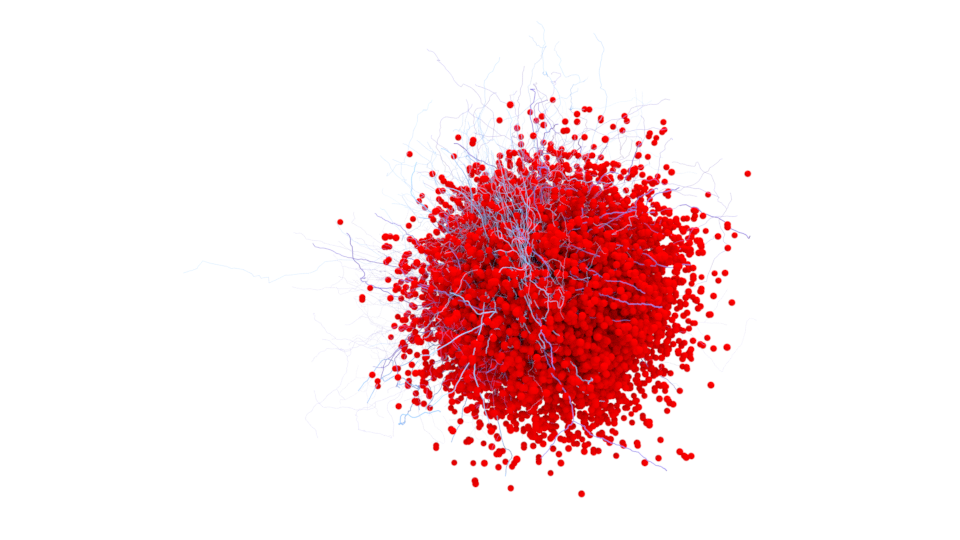

In [4]:
Image(network_image)